# Energy A.I. Hackathon 2021 Workflow - Team Anticline
## Prediction
#### Authors: Esmail Eltahan, Jeon Jonghyeon, Mehran Mehrabi, and Wen Pan, Hildebrand Department of Petroleum and Geosystems Engineering. 
#### The University of Texas at Austin, Austin, Texas USA 

<img src="anticline_official_logo.png" width=300 />



## Building ML Model 

Here, we build a ML model to predict the first year production.

In [443]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import spatial
import seaborn as sns       #

## Load the data 



In [444]:
ai = np.load("2d_ai.npy")
sand_propotion = np.load("2d_sand_propotion.npy")
sandy_shale_propotion = np.load("2d_sandy_shale_propotion.npy")
shale_propotion = np.load("2d_shale_propotion.npy")
shaly_sand_propotion = np.load("2d_shaly_sand_propotion.npy")
top_depth = np.load("2d_top_depth.npy")

df_production = pd.read_csv('production_history.csv')
df_p = pd.read_csv('./preprocessed_data/df_p_preprocessed_{0:03d}.csv'.format(0))
df_n = pd.read_csv('./preprocessed_data/df_n_preprocessed_{0:03d}.csv'.format(1))
df_merged = pd.read_csv('./preprocessed_data/df_merged_{0:03d}.csv'.format(0))
df_n_merged=pd.read_csv('./preprocessed_data/df_n_preprocessed_{0:03d}.csv'.format(1))

## Set up random forest



In [445]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, ExtraTreesRegressor
from sklearn import metrics

def regress_rf(X_variables, y_variable, label, shap=False):
    print("Features size: ", X_variables.shape)
    y_trains = []
    y_pred_trains = []
    y_tests = []
    y_pred_tests = []
    np.random.seed(1)
    NN =10
    for i in range(NN):
        X_train, X_test, y_train, y_test = train_test_split(X_variables, y_variable, test_size = 0.3)
        

#         print("Training data set size: ",y_train.shape[0])
#         print("Testing data set size: ",y_test.shape[0])

        regressor = RandomForestRegressor(n_estimators=800, max_depth=25, min_samples_leaf=2,\
                                   min_samples_split= 2, max_features= 'sqrt', bootstrap =False )

        regressor.fit(X_train, y_train)
        y_pred_test = regressor.predict(X_test)

        y_pred_train = regressor.predict(X_train)
        if i < NN-1:
            del regressor
        y_trains.append(y_train)
        y_pred_trains.append(y_pred_train)
        y_tests.append(y_test)
        y_pred_tests.append(y_pred_test)
    y_trains = np.array(y_trains).flatten()
    y_pred_trains = np.array(y_pred_trains).flatten()
    y_tests = np.array(y_tests).flatten()
    y_pred_tests = np.array(y_pred_tests).flatten()

    print("\nMETRICS FOR TESTING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_tests, y_pred_tests))
    print('Mean Squared Error:', metrics.mean_squared_error(y_tests, y_pred_tests))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_tests, y_pred_tests)))
    print('R-Squared:', metrics.r2_score(y_tests, y_pred_tests))
    print('Explained variance:', metrics.explained_variance_score(y_tests, y_pred_tests))
    print("\nMETRICS FOR TRAINING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_trains, y_pred_trains))
    print('Mean Squared Error:', metrics.mean_squared_error(y_trains, y_pred_trains))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_trains, y_pred_trains)))
    print('R-Squared:', metrics.r2_score(y_trains, y_pred_trains))
    print('Explained variance:', metrics.explained_variance_score(y_trains, y_pred_trains))

    # feature importance
#     # Get numerical feature importances
#     feature_names = X_variables.columns
#     feature_list = list(X_variables.columns)
#     importances = list(rf.feature_importances_)

#     # List of tuples with variable and importance
#     feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

#     # Sort the feature importances by most important first
#     feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

#     # Print out the feature and importances
#     [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

    # Training data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=y_trains, y=y_pred_trains, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))  

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_training.png",
        bbox_inches='tight', dpi=150)
    plt.show()

    plt.close()

    # Testing data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=y_tests, y=y_pred_tests, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_testing.png",
        bbox_inches='tight', dpi=150)
    plt.show()
    plt.close()
    
    # plotting feature importance
    # Import matplotlib for plotting and use magic command for Jupyter Notebooks

    # list of x locations for plotting
#     plt.figure()
#     x_values = list(range(len(importances)))
#     # Make a bar chart
#     plt.barh(x_values,importances, orientation = 'horizontal')#
#     # Tick labels for x axis
#     plt.yticks(x_values,feature_list )#, rotation='vertical'
#     # Axis labels and title
#     plt.ylabel(''); plt.xlabel('Importance'); plt.title('Variable Importances');
#     plt.savefig(
#         "Importances_randomforest.png",
#         bbox_inches='tight', dpi=200)
#     plt.show()
    
    #SHAP ###
    if shap:
        import shap
        samples = shap.sample(X_train, 10)
        explainer = shap.KernelExplainer(regressor.predict, samples)

        shap_values = explainer.shap_values(X_train)
        v = plt.figure("shap")
        shap.summary_plot(shap_values, X_train)
        v.savefig("shap_plot1_rf.png", bbox_inches='tight', dpi=200)
        plt.close()
        b = plt.figure("shap_bar")
        shap.summary_plot(shap_values, X_train, plot_type="bar")
        b.savefig("shap_plot_bar_rf.png", bbox_inches='tight', dpi=200)
        plt.close()
    return regressor

## Set up linear regression

In [446]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

def regress_linear(X_variables, y_variable, label, shap=False):
    print("Features size: ", X_variables.shape)
    y_trains = []
    y_pred_trains = []
    y_tests = []
    y_pred_tests = []
    np.random.seed(1)
    NN =10
    for i in range(NN):
        X_train, X_test, y_train, y_test = train_test_split(X_variables, y_variable, test_size = 0.3)


        regressor = LinearRegression()

        regressor.fit(X_train, y_train)
        y_pred_test = regressor.predict(X_test)

        y_pred_train = regressor.predict(X_train)
        if i < NN-1:
            del regressor
        y_trains.append(y_train)
        y_pred_trains.append(y_pred_train)
        y_tests.append(y_test)
        y_pred_tests.append(y_pred_test)
    y_trains = np.array(y_trains).flatten()
    y_pred_trains = np.array(y_pred_trains).flatten()
    y_tests = np.array(y_tests).flatten()
    y_pred_tests = np.array(y_pred_tests).flatten()

    print("\nMETRICS FOR TESTING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_tests, y_pred_tests))
    print('Mean Squared Error:', metrics.mean_squared_error(y_tests, y_pred_tests))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_tests, y_pred_tests)))
    print('R-Squared:', metrics.r2_score(y_tests, y_pred_tests))
    print('Explained variance:', metrics.explained_variance_score(y_tests, y_pred_tests))
    print("\nMETRICS FOR TRAINING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_trains, y_pred_trains))
    print('Mean Squared Error:', metrics.mean_squared_error(y_trains, y_pred_trains))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_trains, y_pred_trains)))
    print('R-Squared:', metrics.r2_score(y_trains, y_pred_trains))
    print('Explained variance:', metrics.explained_variance_score(y_trains, y_pred_trains))


    # Training data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=y_trains, y=y_pred_trains, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))  

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_training.png",
        bbox_inches='tight', dpi=200)
    plt.show()

    plt.close()

    # Testing data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=y_tests, y=y_pred_tests, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_testing.png",
        bbox_inches='tight', dpi=150)
    plt.show()
    plt.close()

    if shap:
        #SHAP ###
        import shap
        samples = shap.sample(X_train, 10)
        explainer = shap.KernelExplainer(regressor.predict, samples)

        shap_values = explainer.shap_values(X_train)
        v = plt.figure("shap")
        shap.summary_plot(shap_values, X_train)
        v.savefig("shap_plot1_rf.png", bbox_inches='tight', dpi=150)
        plt.close()
        b = plt.figure("shap_bar")
        shap.summary_plot(shap_values, X_train, plot_type="bar")
        b.savefig("shap_plot_bar_rf.png", bbox_inches='tight', dpi=200)
        plt.close()
    return regressor

## Set up SVR

In [447]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def regress_svr(X_variables, y_variable, label, shap=False):
    print("Features size: ", X_variables.shape)
    y_trains = []
    y_pred_trains = []
    y_tests = []
    y_pred_tests = []
    
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    sc_X.fit(X_variables.values)
    means_X = sc_X.mean_ 
    vars_X = sc_X.var_  
    sc_y.fit(y_variable.values.reshape(-1, 1))
    means_y = sc_y.mean_ 
    vars_y = sc_y.var_ 
    X = sc_X.transform(X_variables.values)
    y = sc_y.transform(y_variable.values.reshape(-1, 1))
    
    np.random.seed(1)
    NN =10
    for i in range(NN):
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1), test_size = 0.3)

        regressor = SVR(kernel = 'rbf', C = 10, gamma='auto', epsilon = 0.1)
        regressor.fit(X_train, y_train)
        
        y_pred_test = regressor.predict(X_test)
        y_pred_train = regressor.predict(X_train)
        
        y_pred_test = sc_y.inverse_transform(y_pred_test).reshape(-1)
        y_pred_train = sc_y.inverse_transform(y_pred_train).reshape(-1)
        y_train = sc_y.inverse_transform(y_train).reshape(-1)
        y_test = sc_y.inverse_transform(y_test).reshape(-1)
        
        if i < NN-1:
            del regressor
        y_trains.append(y_train)
        y_pred_trains.append(y_pred_train)
        y_tests.append(y_test)
        y_pred_tests.append(y_pred_test)
    y_trains = np.array(y_trains).flatten()
    y_pred_trains = np.array(y_pred_trains).flatten()
    y_tests = np.array(y_tests).flatten()
    y_pred_tests = np.array(y_pred_tests).flatten()

    print("\nMETRICS FOR TESTING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_tests, y_pred_tests))
    print('Mean Squared Error:', metrics.mean_squared_error(y_tests, y_pred_tests))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_tests, y_pred_tests)))
    print('R-Squared:', metrics.r2_score(y_tests, y_pred_tests))
    print('Explained variance:', metrics.explained_variance_score(y_tests, y_pred_tests))
    print("\nMETRICS FOR TRAINING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_trains, y_pred_trains))
    print('Mean Squared Error:', metrics.mean_squared_error(y_trains, y_pred_trains))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_trains, y_pred_trains)))
    print('R-Squared:', metrics.r2_score(y_trains, y_pred_trains))
    print('Explained variance:', metrics.explained_variance_score(y_trains, y_pred_trains))

    # Training data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=y_trains, y=y_pred_trains, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))  

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_training.png",
        bbox_inches='tight', dpi=150)
    plt.show()

    plt.close()

    # Testing data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=y_tests, y=y_pred_tests, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_testing.png",
        bbox_inches='tight', dpi=150)
    plt.show()
    plt.close()
 
    #SHAP ###
    if shap:
        import shap
        samples = shap.sample(X_train, 10)
        explainer = shap.KernelExplainer(regressor.predict, samples)

        shap_values = explainer.shap_values(X_train)
        v = plt.figure("shap")
        shap.summary_plot(shap_values, X_train)
        v.savefig("shap_plot1_rf.png", bbox_inches='tight', dpi=200)
        plt.close()
        b = plt.figure("shap_bar")
        shap.summary_plot(shap_values, X_train, plot_type="bar")
        b.savefig("shap_plot_bar_rf.png", bbox_inches='tight', dpi=200)
        plt.close()
        return regressor

In [448]:
df_merged.columns

Index(['Well_ID', 'X', 'Y', 'Depth', 'Porosity', 'Perm', 'AI', 'Density',
       'Comp_vel', 'E', 'Vs', 'G', 'layer', 'lith_id', 'Log_perm', 'mindist',
       'avg_inv_dist', 'avg_sq_inv_dist', 'avg_sqrt_inv_dist', 'log_mindist',
       'Top_depth', 'interval', 'distance to woc', 'distance to fault',
       'fault indicator', 'Avg_perm', 'thickness', 'bottom to woc',
       'sand prp.', 'sandshaly prp.', 'k/log_mindist', 'coeff',
       'mindist_squared', 'Cumoil1', 'Cumoil2', 'Cumoil3', 'Cumwater1',
       'Cumwater2', 'Cumwater3', 'prod_o1', 'prod_o2', 'prod_o3', 'prod_w1',
       'prod_w2', 'prod_w3', 'oil12', 'oil23', 'water12', 'water23', 'wcut1',
       'wcut2', 'wcut3', 'wcutincrease1', 'wcutincrease2', 'total1', 'total2',
       'total3', 'area_poly', 'dp_1', 'dp_2', 'dp_3', 'woc rise 0',
       'woc rise 1', 'woc rise 2', 'woc rise 3', 'bottom to woc 1',
       'bottom to woc 2', 'bottom to woc 3'],
      dtype='object')

## Total production regression

Features size:  (73, 5)

METRICS FOR TESTING DATA:

Mean Absolute Error: 165.237429657197
Mean Squared Error: 48156.92361511341
Root Mean Squared Error: 219.4468582940148
R-Squared: 0.615952194023059
Explained variance: 0.6161771463864583

METRICS FOR TRAINING DATA:

Mean Absolute Error: 44.51214336601299
Mean Squared Error: 4393.559673022762
Root Mean Squared Error: 66.28393223868633
R-Squared: 0.9557592784519041
Explained variance: 0.9557592784519041


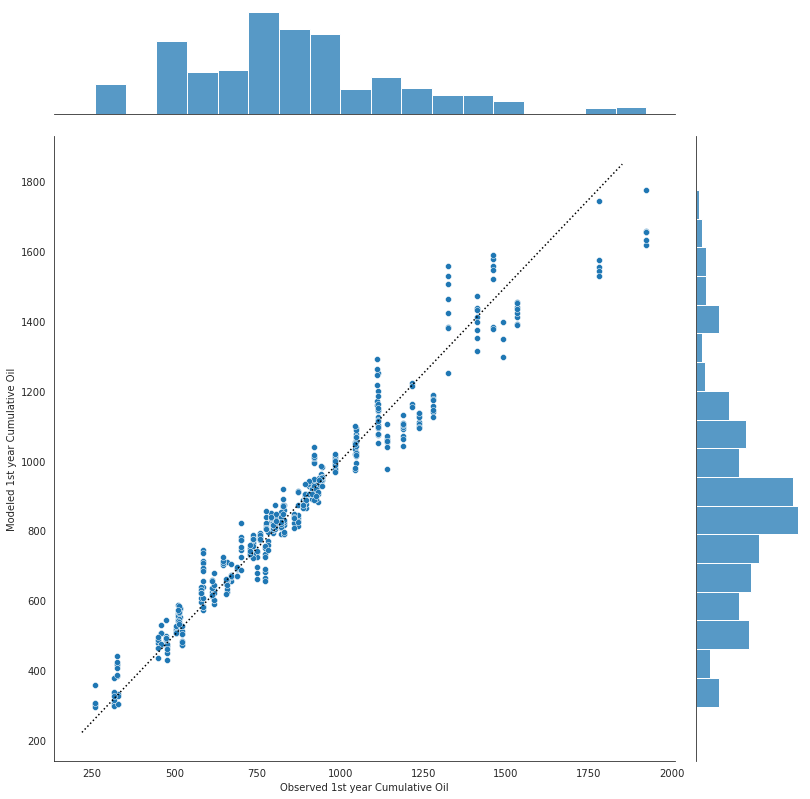

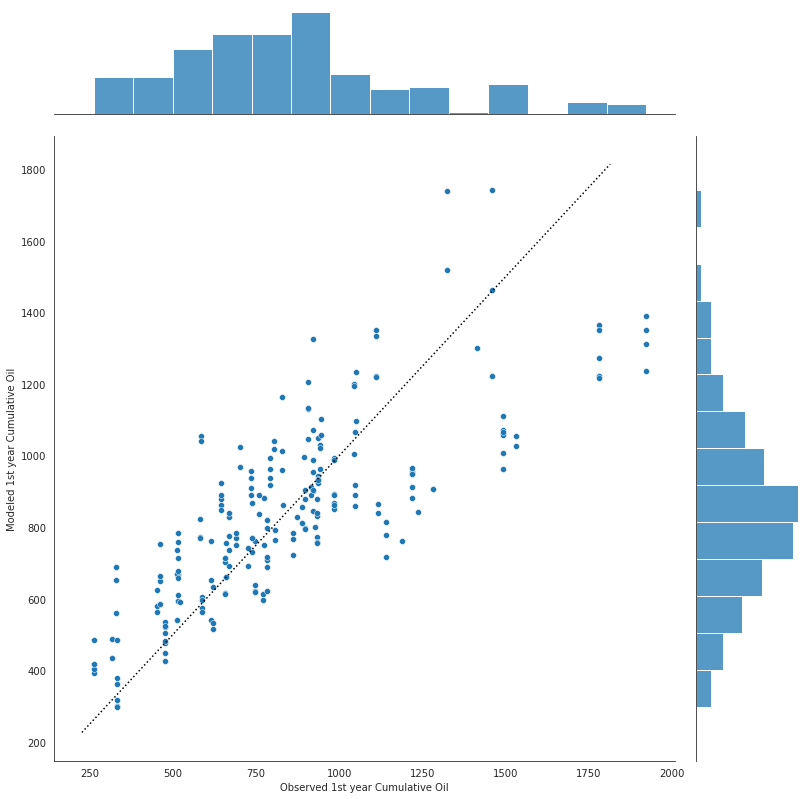

In [449]:
X_total = df_merged[[ "Porosity", "Perm",  'sand prp.', 'bottom to woc', 'avg_inv_dist']]
y_total = df_merged['total1']
label = '1st year Cumulative Oil'

regressor_total1 = regress_rf(X_total, y_total, label)

## Water cut regression

Features size:  (73, 4)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.04493959952572153
Mean Squared Error: 0.0031431526364058123
Root Mean Squared Error: 0.056063826451695324
R-Squared: 0.8637016657368524
Explained variance: 0.863902335201614

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.01184791747941823
Mean Squared Error: 0.0002677211172181898
Root Mean Squared Error: 0.016362185588062184
R-Squared: 0.9864650809998692
Explained variance: 0.9864650809998692


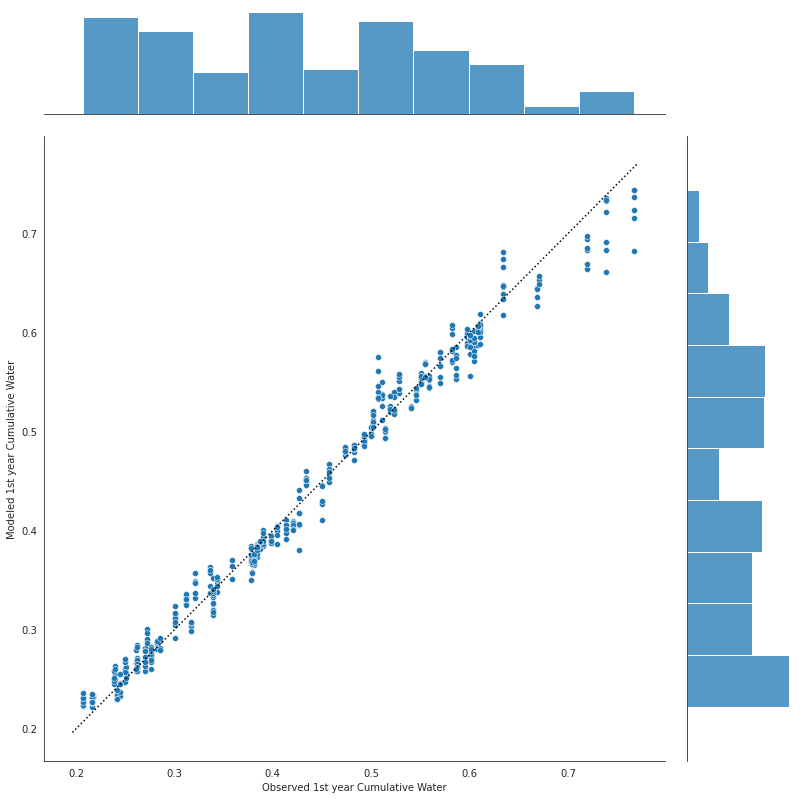

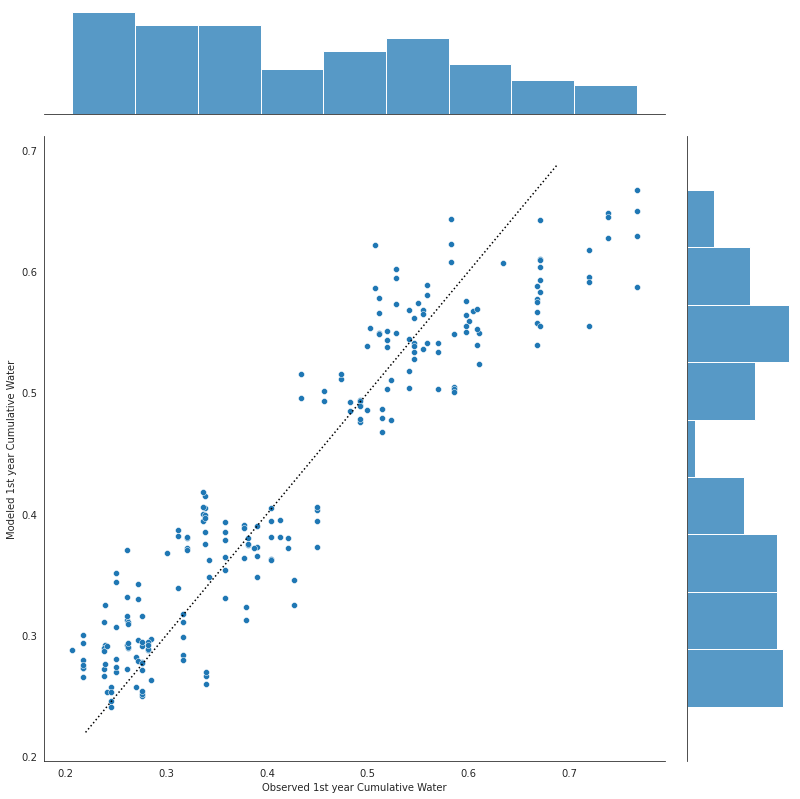

In [450]:
X_wcut = df_merged[[ "Porosity", "Perm", 'log_mindist', 'bottom to woc']]
y_wcut = df_merged['wcut1']
label = '1st year Cumulative Water'
regressor_wcut = regress_rf(X_wcut, y_wcut, label)

Features size:  (73, 2)

METRICS FOR TESTING DATA:

Mean Absolute Error: 35.7649065071929
Mean Squared Error: 2050.243129457111
Root Mean Squared Error: 45.279610526782484
R-Squared: 0.9873421519604495
Explained variance: 0.9873436160927788

METRICS FOR TRAINING DATA:

Mean Absolute Error: 35.747958937328946
Mean Squared Error: 2058.7474141617176
Root Mean Squared Error: 45.373421891694676
R-Squared: 0.9891817867790302
Explained variance: 0.9891817867790302


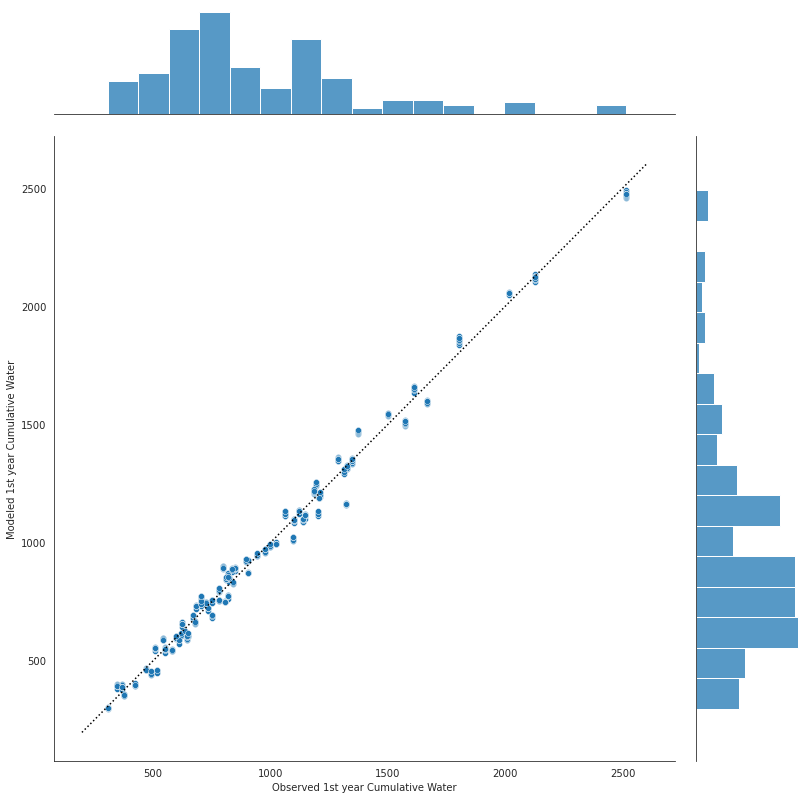

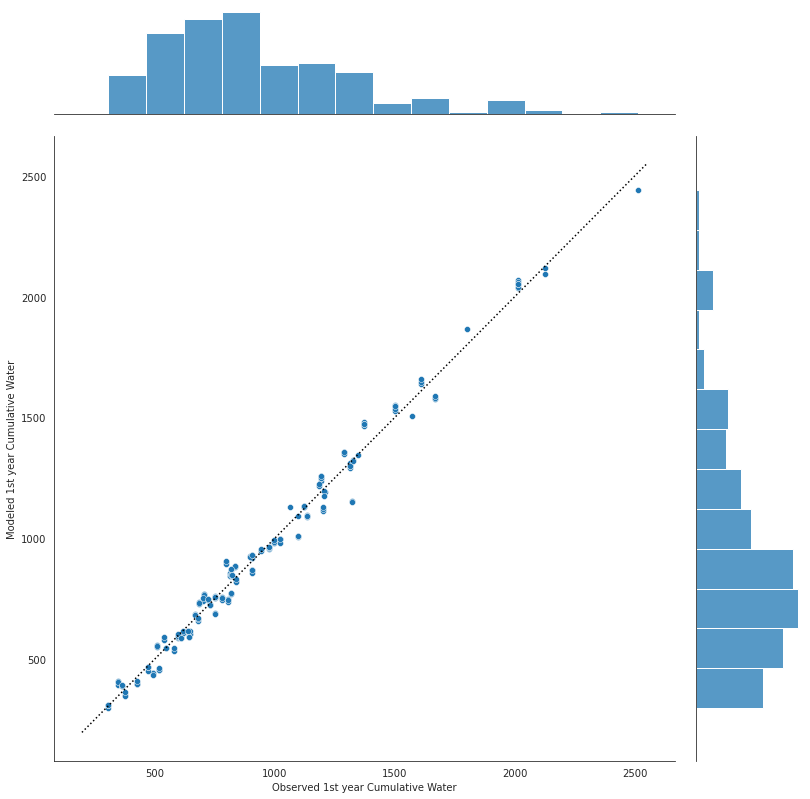

In [451]:
X = df_merged[[ "Cumoil1", "wcut1"]]
y = df_merged['Cumoil3']
label = '1st year Cumulative Water'
regressor_13 = regress_linear(X, y, label)

Features size:  (73, 1)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.030379848028425614
Mean Squared Error: 0.0015822909989434138
Root Mean Squared Error: 0.03977802155642502
R-Squared: 0.7525257072756472
Explained variance: 0.7536612526529529

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.02945234318678195
Mean Squared Error: 0.0015478360295505123
Root Mean Squared Error: 0.039342547319035054
R-Squared: 0.7909887150506902
Explained variance: 0.7909887150506902


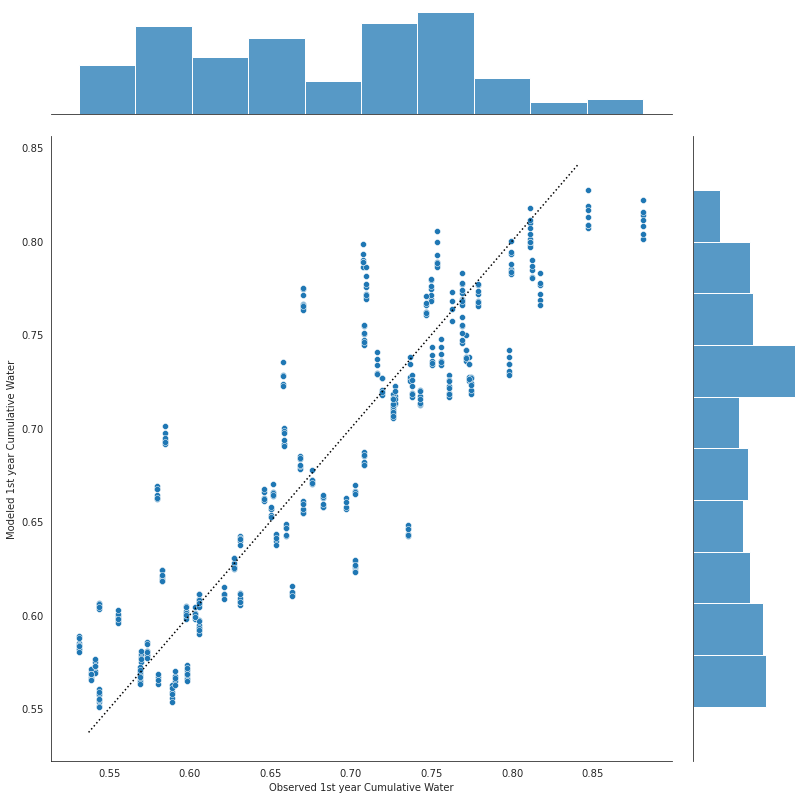

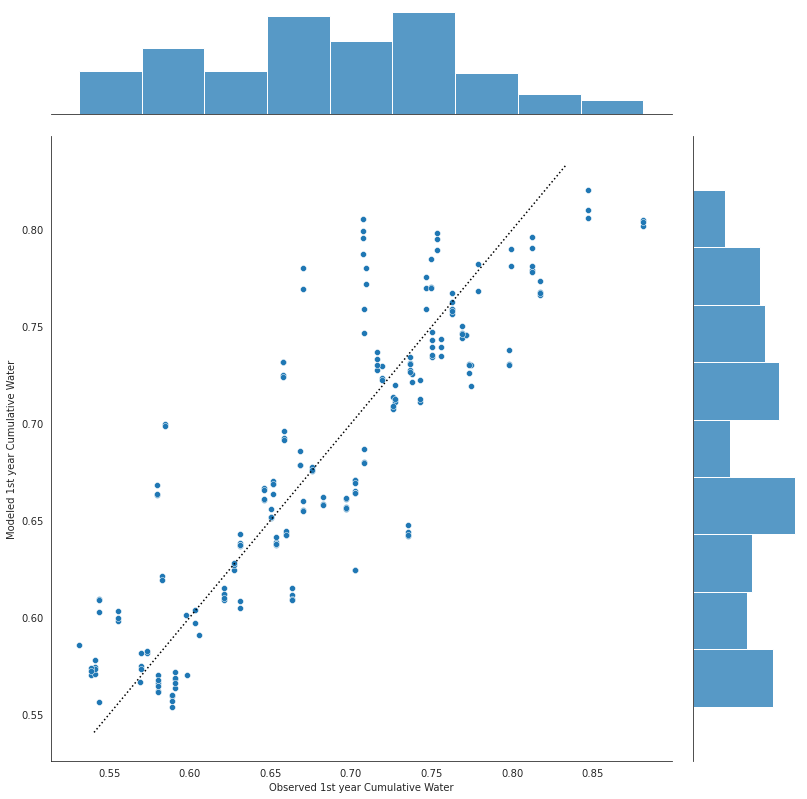

In [452]:
X_wcut = df_merged[[  'bottom to woc']]
y_wcut = df_merged['wcut2']
label = '1st year Cumulative Water'
regressor_wcut = regress_linear(X_wcut, y_wcut, label)

## Water cut dyanamics regression

In the section below, we model the change in the watercut as a function of the rise in water oil contact. 

Features size:  (73, 1)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.12564424956753661
Mean Squared Error: 0.02443748688666133
Root Mean Squared Error: 0.15632494006607303
R-Squared: 0.8317275385507974
Explained variance: 0.8401846010136169

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.12585819820335964
Mean Squared Error: 0.025077855391297813
Root Mean Squared Error: 0.1583598919906736
R-Squared: 0.8611718081566969
Explained variance: 0.8611718081566969


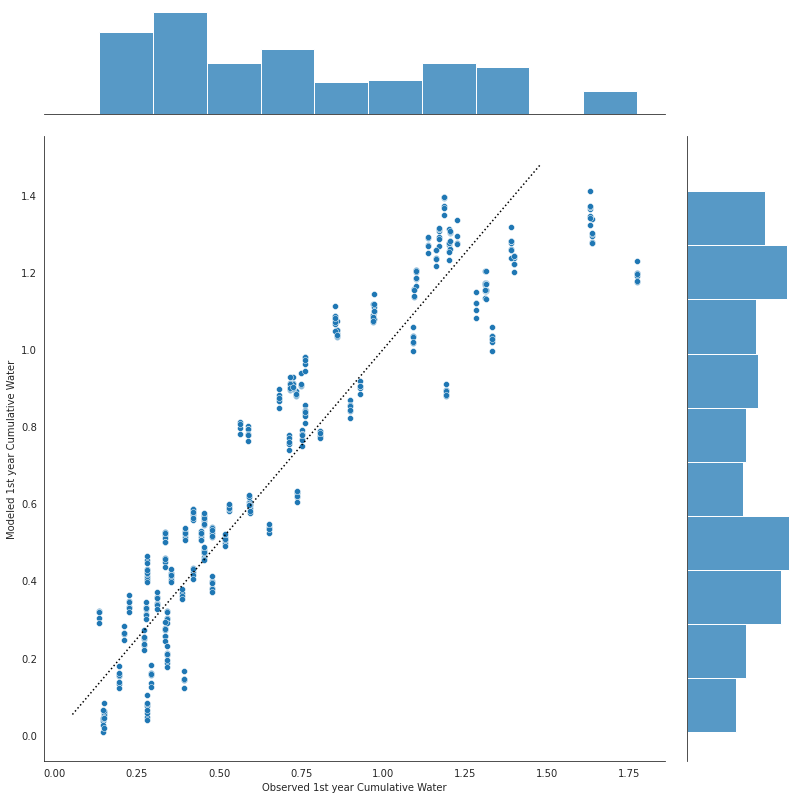

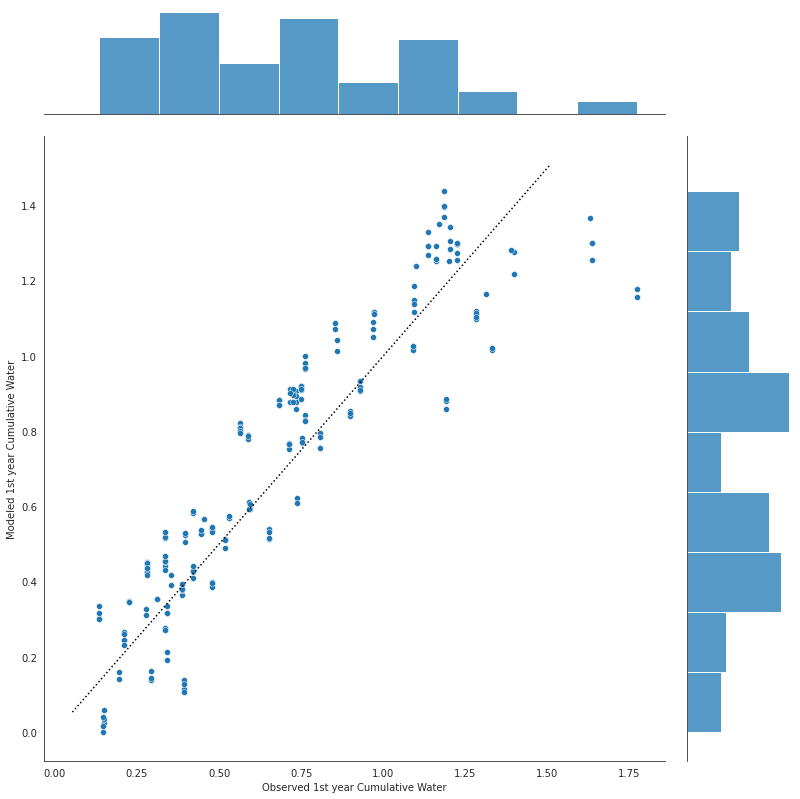

In [453]:
X_wcut = df_merged[[  'bottom to woc 1']]
y_wcut = df_merged['wcutincrease1']
label = '1st year Cumulative Water'
regressor_wcut = regress_linear(X_wcut, y_wcut, label)

Features size:  (73, 1)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.040033799091918676
Mean Squared Error: 0.0025982975568178907
Root Mean Squared Error: 0.05097349857345374
R-Squared: 0.8635716167691999
Explained variance: 0.8646281858844563

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.03648984030374501
Mean Squared Error: 0.002196187786216761
Root Mean Squared Error: 0.0468635016427151
R-Squared: 0.8978872935706066
Explained variance: 0.8978872935706066


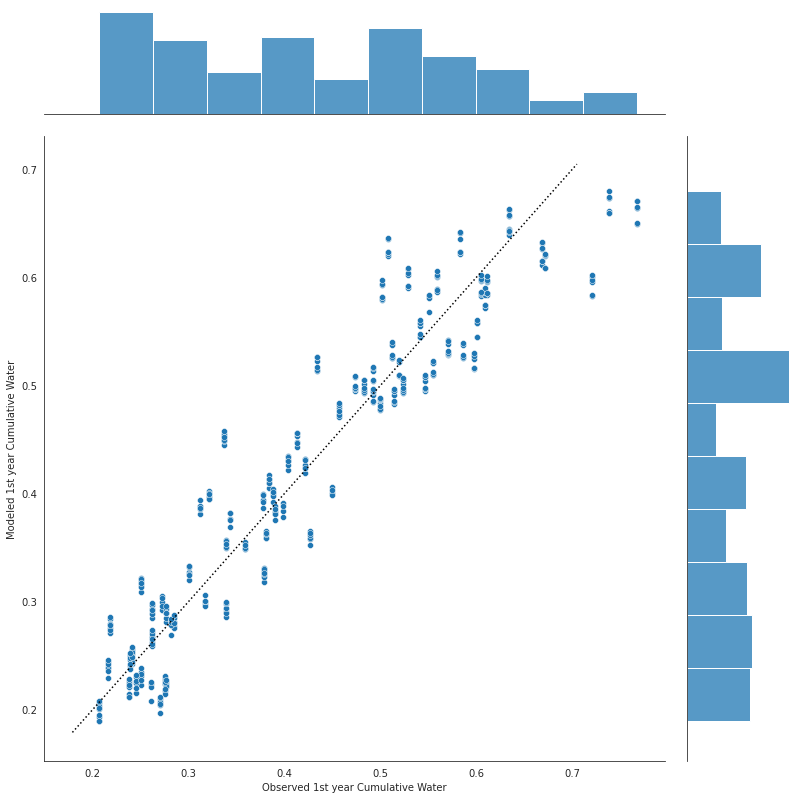

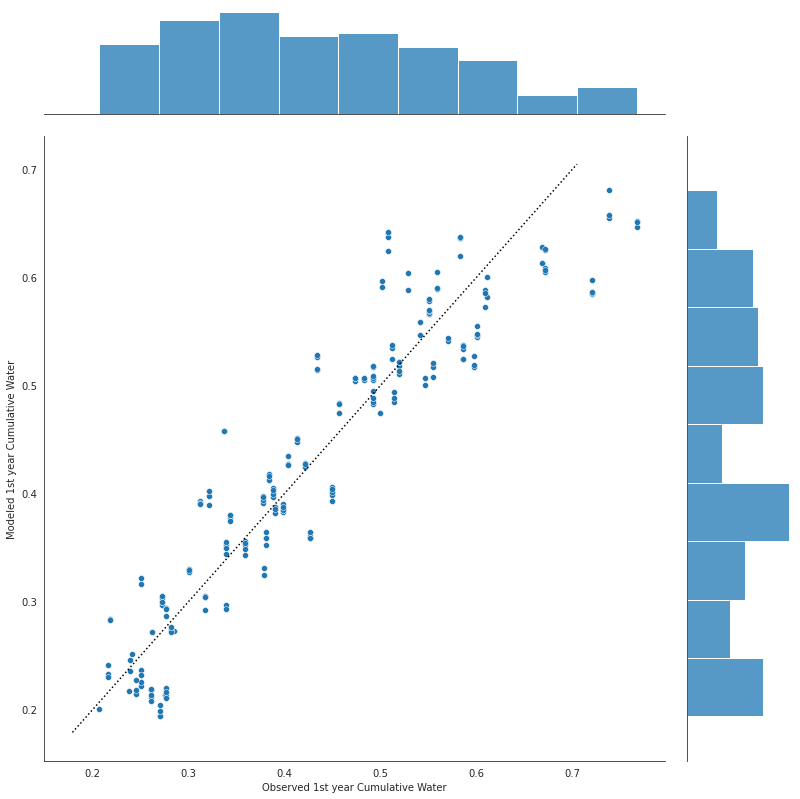

In [454]:
X_wcut = df_merged[['bottom to woc']]
y_wcut = df_merged['wcut1']
label = '1st year Cumulative Water'
regressor_wcut = regress_linear(X_wcut, y_wcut, label)

Features size:  (219, 1)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.12826859479142125
Mean Squared Error: 0.021993964422147447
Root Mean Squared Error: 0.14830362241748327
R-Squared: 0.3507459089689995
Explained variance: 0.3509696803577619

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.12322863213194087
Mean Squared Error: 0.020561449970766654
Root Mean Squared Error: 0.14339264266609586
R-Squared: 0.3718768723291156
Explained variance: 0.3718768723291156


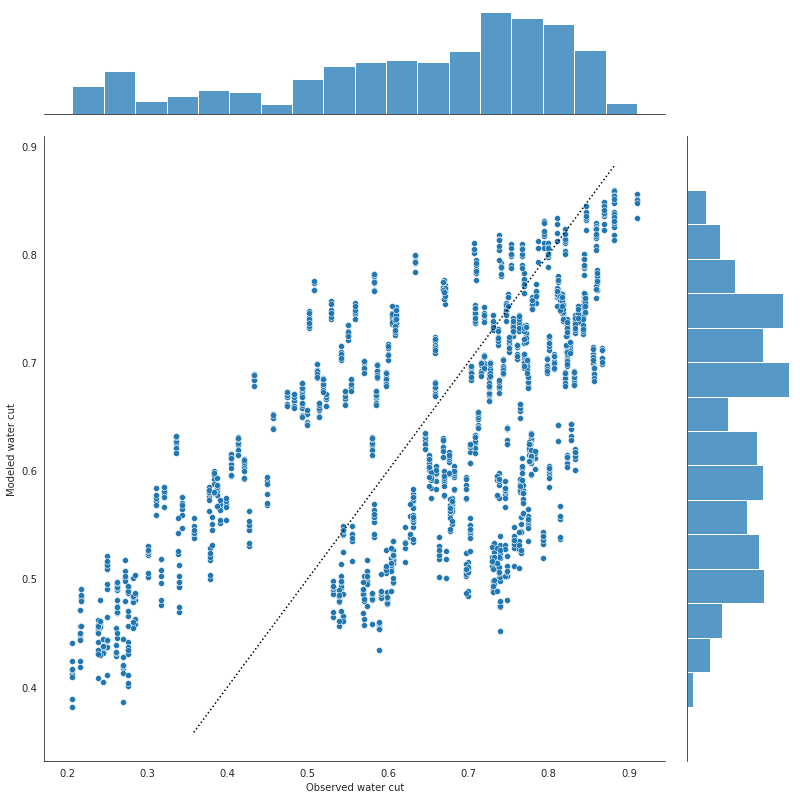

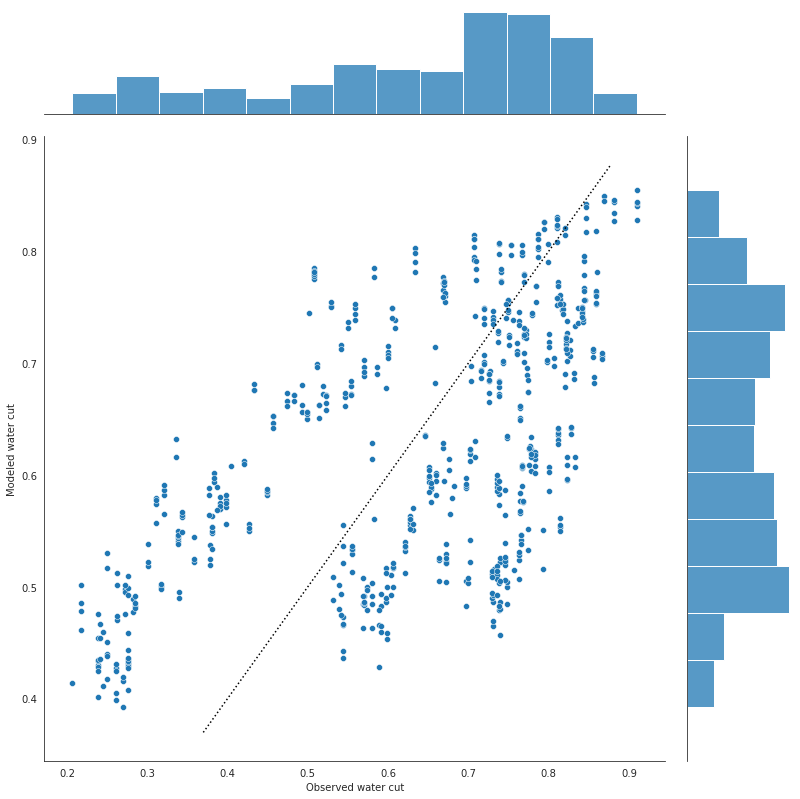

In [455]:
X_wcut = np.concatenate([df_merged[['bottom to woc']].values, df_merged[['bottom to woc 1']].values, df_merged[['bottom to woc 2']].values], axis=0)
y_wcut = np.concatenate([df_merged['wcut1'].values, df_merged['wcut2'].values, df_merged['wcut3'].values], axis=0)
label = 'water cut'
regressor_wcut = regress_linear(X_wcut, y_wcut, label)

Features size:  (219, 1)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.12826859479142125
Mean Squared Error: 0.021993964422147447
Root Mean Squared Error: 0.14830362241748327
R-Squared: 0.3507459089689995
Explained variance: 0.3509696803577619

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.12322863213194087
Mean Squared Error: 0.020561449970766654
Root Mean Squared Error: 0.14339264266609586
R-Squared: 0.3718768723291156
Explained variance: 0.3718768723291156


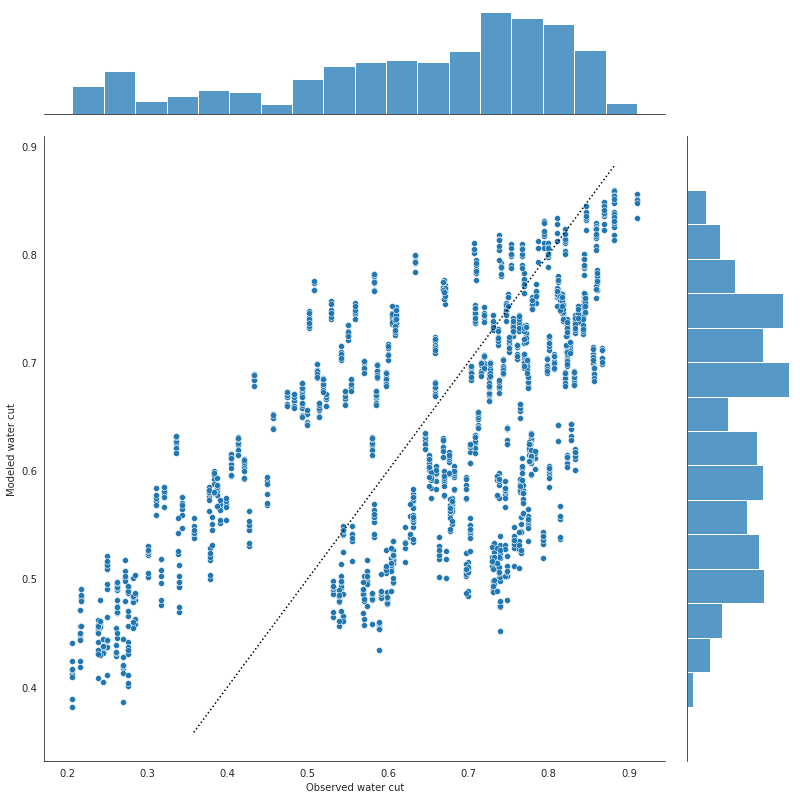

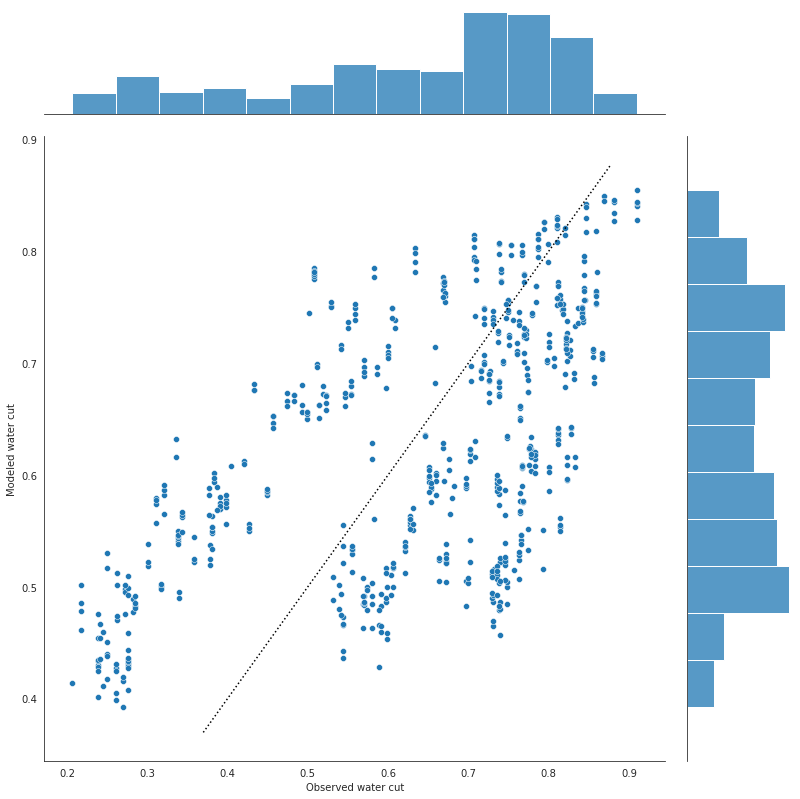

In [456]:
X_wcut = np.concatenate([df_merged[['bottom to woc']].values, df_merged[['bottom to woc 1']].values, df_merged[['bottom to woc 2']].values], axis=0)
y_wcut = np.concatenate([df_merged['wcut1'].values, df_merged['wcut2'].values, df_merged['wcut3'].values], axis=0)
label = 'water cut'
regressor_wcut = regress_linear(X_wcut, y_wcut, label)

Features size:  (219, 2)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.07612703800323987
Mean Squared Error: 0.008533300977710694
Root Mean Squared Error: 0.09237586794022935
R-Squared: 0.7480999576320783
Explained variance: 0.7481001397040823

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.07862894730230811
Mean Squared Error: 0.008808225758224094
Root Mean Squared Error: 0.0938521483942914
R-Squared: 0.7309211986337034
Explained variance: 0.7309211986337034


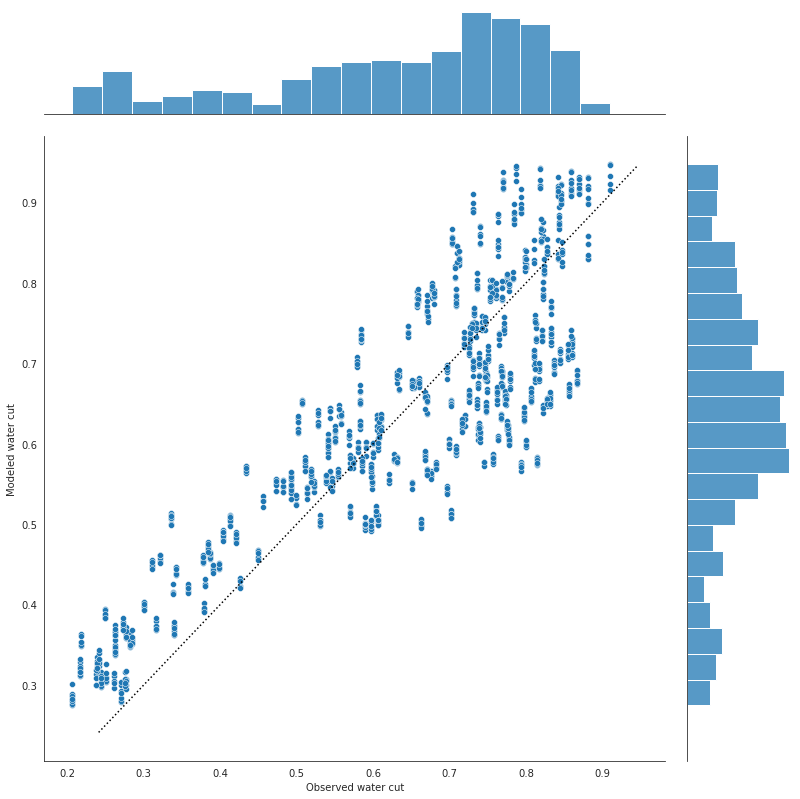

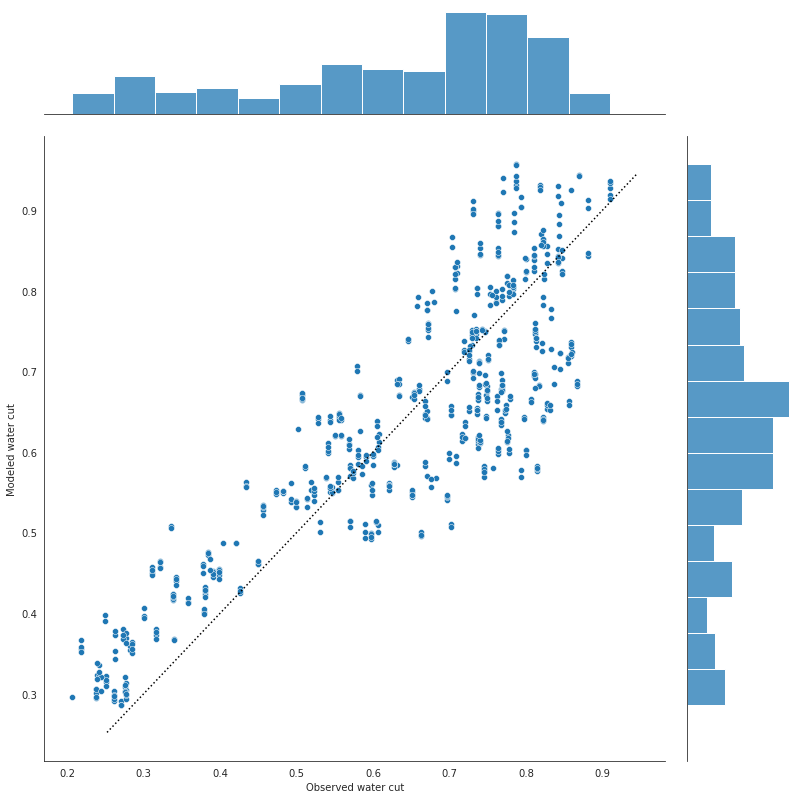

In [457]:
X_wcut = np.concatenate([df_merged[['bottom to woc', 'woc rise 0']].values, df_merged[['bottom to woc', 'woc rise 1']].values, df_merged[['bottom to woc', 'woc rise 2']].values], axis=0)
y_wcut = np.concatenate([df_merged['wcut1'].values, df_merged['wcut2'].values, df_merged['wcut3'].values], axis=0)
label = 'water cut'
regressor_wcut = regress_linear(X_wcut, y_wcut, label)


Features size:  (219, 1)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.1432913114955604
Mean Squared Error: 0.02741098174647157
Root Mean Squared Error: 0.16556262182772888
R-Squared: 0.1908374635656016
Explained variance: 0.1909467846413908

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.13761575212722565
Mean Squared Error: 0.025672641799847337
Root Mean Squared Error: 0.16022684481648927
R-Squared: 0.21573721280254943
Explained variance: 0.21573721280254943


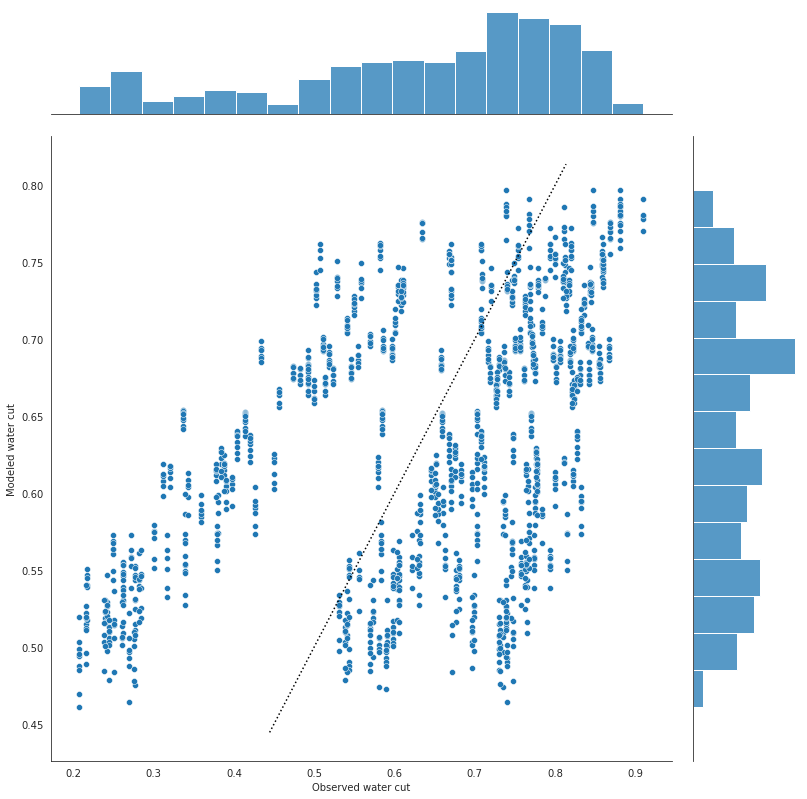

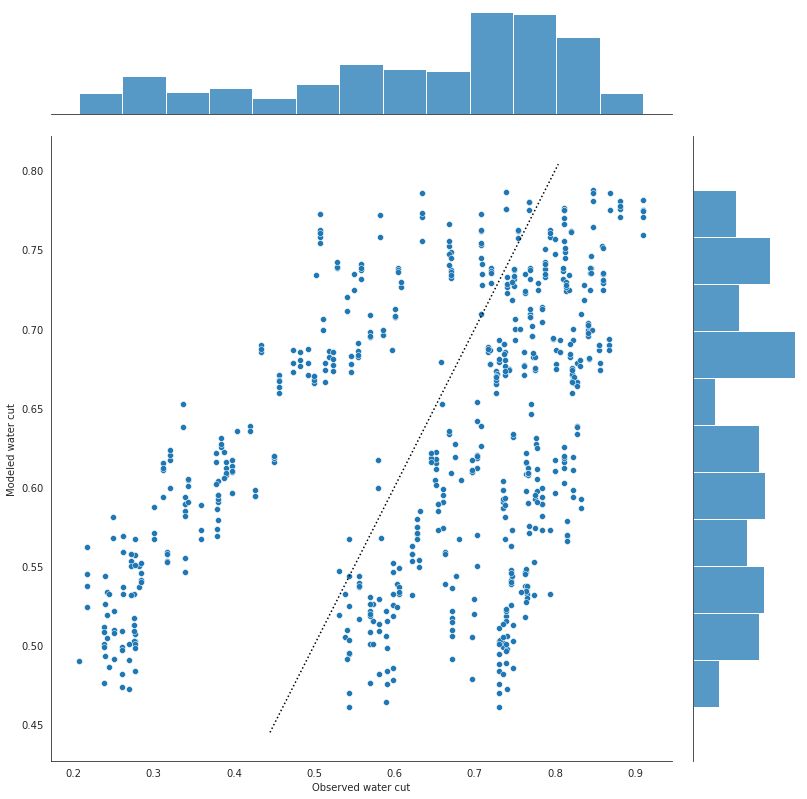

In [458]:

X_wcut = np.concatenate([df_merged[['bottom to woc']].values, df_merged[['bottom to woc']].values, df_merged[['bottom to woc']].values], axis=0)
y_wcut = np.concatenate([df_merged['wcut1'].values, df_merged['wcut2'].values, df_merged['wcut3'].values], axis=0)
label = 'water cut'
regressor_wcut = regress_linear(X_wcut, y_wcut, label)

## Function to calculate 1st year oil prod

we basically form a pipeline that has a machine learning model that predicts water cut and total and then calculate oil.

In [459]:
def calculate_cum1(X_total, X_wcut, total, wcut, oil, label):
    oil_tests = []
    oil_predict_tests = []
    np.random.seed(1)
    for i in range(10):
        X_total_train, X_total_test, X_wcut_train, X_wcut_test, total_train, total_test, wcut_train, wcut_test, oil_train, oil_test  = \
        train_test_split(X_total, X_wcut, total, wcut, oil , test_size = 0.3)
        regressor_total = RandomForestRegressor(n_estimators=800, max_depth=25, min_samples_leaf=2,\
                                   min_samples_split= 2, max_features= 'sqrt', bootstrap =False )
        regressor_total.fit(X_total_train, total_train)
        total_predict_test = regressor_total.predict(X_total_test)
        del regressor_total
        regressor_wcut = LinearRegression()
        regressor_wcut.fit(X_wcut_train, wcut_train)     
        wcut_predict_test = regressor_wcut.predict(X_wcut_test)
        del regressor_wcut
        oil_predict_test = total_predict_test*(1-wcut_predict_test)
        oil_tests.append(oil_test)
        oil_predict_tests.append(oil_predict_test)
#         print(oil_test.shape == oil_predict_test.shape)
    
    oil_tests = np.array(oil_tests).flatten()
    oil_predict_tests = np.array(oil_predict_tests).flatten()
    print(oil_tests.shape)
    print(oil_predict_tests.shape)

    print("\nMETRICS FOR TESTING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(oil_tests, oil_predict_tests))
    print('Mean Squared Error:', metrics.mean_squared_error(oil_tests, oil_predict_tests))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(oil_tests, oil_predict_tests)))
    print('R-Squared:', metrics.r2_score(oil_tests, oil_predict_tests))
    print('Explained variance:', metrics.explained_variance_score(oil_tests, oil_predict_tests))

    

    # Testing data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=oil_tests, y=oil_predict_tests, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_testing.png",
        bbox_inches='tight', dpi=200)
    plt.show()
    plt.close()
    

(220,)
(220,)

METRICS FOR TESTING DATA:

Mean Absolute Error: 93.36688200395835
Mean Squared Error: 14668.349761798076
Root Mean Squared Error: 121.11296281487823
R-Squared: 0.7485017172346683
Explained variance: 0.7512608468707141


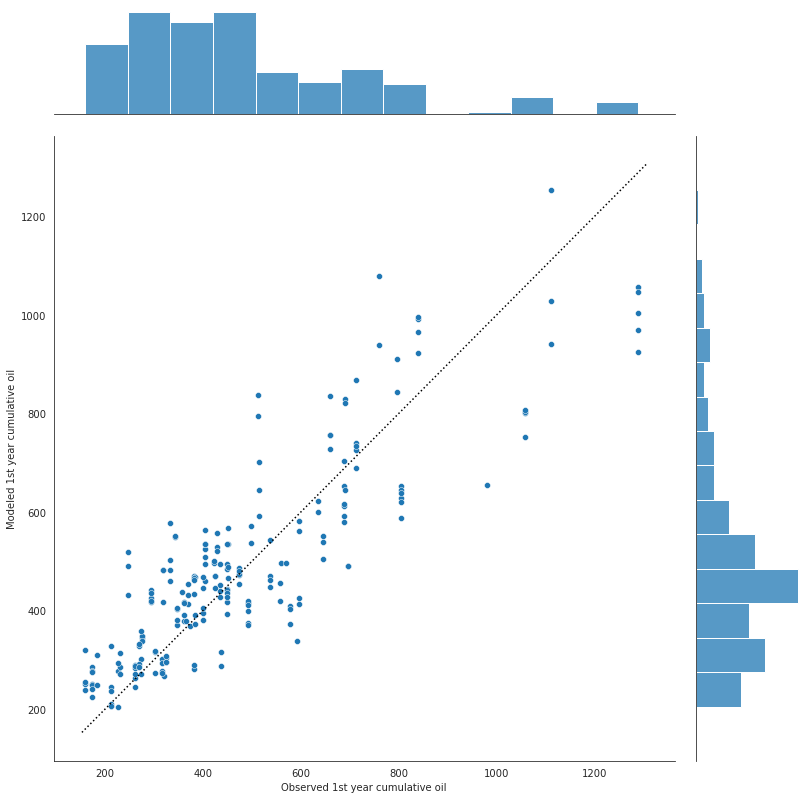

In [460]:
X_wcut = df_merged[['bottom to woc']]
y_wcut = df_merged['wcut1']
X_total = df_merged[[ "Porosity", "Perm",  'sand prp.', 'bottom to woc',  'mindist', 'avg_inv_dist']]
y_total = df_merged['total1']
y_oil = df_merged['Cumoil1']
label = '1st year cumulative oil'
calculate_cum1(X_total, X_wcut, y_total, y_wcut, y_oil, label)

## Function to calculate 3rd year oil prod

we basically form a pipeline that has a machine learning model that predicts water cut and total and then calculate oil.

In [461]:
def calculate_cum3(X_total, X_wcut, total, wcut, oil, label, regressor13, method='rf',test_label):
    oil_tests = []
    oil_predict_tests = []
    np.random.seed(1)
    for i in range(10):
        X_total_train, X_total_test, X_wcut_train, X_wcut_test, total_train, total_test, wcut_train, wcut_test, oil_train, oil_test  = \
        train_test_split(X_total, X_wcut, total, wcut, oil , test_size = 0.3)
        if method == 'rf':
            regressor_total = RandomForestRegressor(n_estimators=800, max_depth=25, min_samples_leaf=2,\
                                   min_samples_split= 2, max_features= 'sqrt', bootstrap =False )
        if method == 'linear':
            regressor_total = LinearRegression()
        regressor_total.fit(X_total_train, total_train)
        total_predict_test = regressor_total.predict(X_total_test)
        del regressor_total
        regressor_wcut = LinearRegression()
        regressor_wcut.fit(X_wcut_train, wcut_train)     
        wcut1_predict_test = regressor_wcut.predict(X_wcut_test)
        del regressor_wcut
        oil1_predict_test = total_predict_test*(1-wcut1_predict_test) # 1st year oil
        
        oil_predict_test = regressor13.predict(np.array([oil1_predict_test,wcut1_predict_test]).T) ## 3rd year cum
        
        oil_tests.append(oil_test)
        oil_predict_tests.append(oil_predict_test)
#         print(oil_test.shape == oil_predict_test.shape)
        
    
    oil_tests = np.array(oil_tests).flatten()
    oil_predict_tests = np.array(oil_predict_tests).flatten()
    
    print(oil_tests.shape)
    print(oil_predict_tests.shape)

    print("\nMETRICS FOR TESTING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(oil_tests, oil_predict_tests))
    print('Mean Squared Error:', metrics.mean_squared_error(oil_tests, oil_predict_tests))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(oil_tests, oil_predict_tests)))
    print('R-Squared:', metrics.r2_score(oil_tests, oil_predict_tests))
    print('Explained variance:', metrics.explained_variance_score(oil_tests, oil_predict_tests))

    

    # Testing data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=oil_tests, y=oil_predict_tests, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_testing.png",
        bbox_inches='tight', dpi=200)
    plt.show()
    plt.close()
    

SyntaxError: non-default argument follows default argument (<ipython-input-461-7adf62ed61a6>, line 1)

In [ ]:
X_wcut = df_merged[['bottom to woc']]
y_wcut = df_merged['wcut1']
X_total = df_merged[[ "Porosity", "Perm", 'AI', 'sand prp.', 'bottom to woc',  'mindist', 'avg_inv_dist']]
y_total = df_merged['total1']
y_oil = df_merged['Cumoil3']
label = '3rd year cumulative oil'
calculate_cum3(X_total, X_wcut, y_total, y_wcut, y_oil, label, regressor_13, method='rf')

In [ ]:
X_total = df_merged[[ "Porosity", "Perm",  'sand prp.', 'bottom to woc',  'mindist', 'avg_inv_dist' ]]
y_total = df_merged['Cumoil3']
label = '3rd year cumoil'

regressor_total1 = regress_svr(X_total, y_total, label)

In [ ]:
def calculate_cum4(X_total, X_wcut, total, wcut, oil, label, regressor13, method='rf',test_label=[1]):
    oil_tests = []
    oil_predict_tests = []
    np.random.seed(1)
    X_total_train=X_total[~test_label]
    X_total_test=X_total[test_label]
    X_wcut_train=X_wcut[~test_label]
    X_wcut_test=X_wcut[test_label]
    total_train=total[~test_label]
    total_test=total[test_label]
    wcut_train=wcut[~test_label]
    wcut_test=wcut[test_label]
    oil_train=wcut[~test_label]
    oil_test=oil[test_label]
    
    
    
    
    
    
    if method == 'rf':
        regressor_total = RandomForestRegressor(n_estimators=800, max_depth=25, min_samples_leaf=2,\
                               min_samples_split= 2, max_features= 'sqrt', bootstrap =False )
    if method == 'linear':
        regressor_total = LinearRegression()
    regressor_total.fit(X_total_train, total_train)
    total_predict_test = regressor_total.predict(X_total_test)
    del regressor_total
    regressor_wcut = LinearRegression()
    regressor_wcut.fit(X_wcut_train, wcut_train)     
    wcut1_predict_test = regressor_wcut.predict(X_wcut_test)
    del regressor_wcut
    oil1_predict_test = total_predict_test*(1-wcut1_predict_test) # 1st year oil

    oil_predict_test = regressor13.predict(np.array([oil1_predict_test,wcut1_predict_test]).T) ## 3rd year cum

    oil_tests.append(oil_test)
    oil_predict_tests.append(oil_predict_test)
#         print(oil_test.shape == oil_predict_test.shape)


    oil_tests = np.array(oil_tests).flatten()
    oil_predict_tests = np.array(oil_predict_tests).flatten()
    return oil_predict_tests
    

## Multiscale Modeling

The random forest model is built to match production data at well scale, to capture the spatial distribution of well and formation properties, multi-scale CNN is built to calculate regional production, and combined with RF model to improve estimation accuracy and build uncertainty model.

In [ ]:
ai = np.load("2d_ai.npy")
sand_propotion = np.load("2d_sand_propotion.npy")
sandy_shale_propotion = np.load("2d_sandy_shale_propotion.npy")
shale_propotion = np.load("2d_shale_propotion.npy")
shaly_sand_propotion = np.load("2d_shaly_sand_propotion.npy")
top_depth = np.load("2d_top_depth.npy")

df_production = pd.read_csv('production_history.csv')
df_p = pd.read_csv('./preprocessed_data/df_p_preprocessed_{0:03d}.csv'.format(0))
df_n = pd.read_csv('./preprocessed_data/df_n_preprocessed_{0:03d}.csv'.format(0))
df_merged = pd.read_csv('./preprocessed_data/df_merged_{0:03d}.csv'.format(0))
df_merged['ID']=np.arange(df_merged.shape[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from scipy.ndimage import maximum_filter,rotate
from sklearn.feature_extraction import image

In [462]:
#production data scaling
prod_scale=(df_merged['Cumoil3'].values.max()*1.3-df_merged['Cumoil3'].values.min()*0.7)
prod_bias=df_merged['Cumoil3'].values.min()*0.7
train_y=df_merged['Cumoil3'].values
train_y=(train_y-prod_bias)/prod_scale

#well location map
well_loc=np.zeros((200,200))
prodmap=well_loc.copy()

X=df_merged['X'].values.astype(float).copy()
Y=df_merged['Y'].values.astype(float).copy()
X=np.round((X-25)/50).astype(int)
Y=np.round((Y-25)/50).astype(int)
XY=np.stack([X,Y],axis=1)

df_merged['ID']=np.arange(73)
wellid=np.arange(73)

poro_mean=df_merged['Porosity']
perm_mean=df_merged['Perm']

poro_mean=(poro_mean-poro_mean.min()+0.1)/(poro_mean.max()-poro_mean.min()+0.1)
perm_mean=(perm_mean-perm_mean.min()+0.5)/(perm_mean.max()-perm_mean.min()+0.5)


#well location map
well_loc=np.zeros((200,200))
perm_map=well_loc.copy()
poro_map=well_loc.copy()
prodmap=well_loc.copy()
well_loc[Y,X]=1
new_prod=train_y.copy()
# well data
test_area_dim=[10,199,99,199]
test_id=((X>test_area_dim[2])*(X<test_area_dim[3])*(Y>test_area_dim[0])*(Y<test_area_dim[1])).astype(bool)
my_well_data=np.stack([X,Y,np.ones(73),poro_mean[:73],perm_mean[:73],new_prod,test_id],axis=-1)
    


# poro and perm map are random realizations
map_prop=np.stack([sand_propotion,sandy_shale_propotion,shaly_sand_propotion,
                   shale_propotion,(top_depth-top_depth.min())/(top_depth.max()-top_depth.min())+0.0001,
                   (ai-ai.min())/(ai.max()-ai.min())+0.0001,well_loc,poro_map,perm_map,prodmap],axis=-1)



In [463]:
# function for data augmentation
def rot(image, xy, angle):
    im_rot = rotate(image,angle,reshape=True,order=1)
    org_center = (np.array(image.shape[:2][::-1])-1)/2.
    rot_center = (np.array(im_rot.shape[:2][::-1])-1)/2.
    org = xy-org_center
    a = np.deg2rad(angle)
    new = np.array([org[:,0]*np.cos(a) + org[:,1]*np.sin(a),
            -org[:,0]*np.sin(a) + org[:,1]*np.cos(a) ]).T
    return im_rot, np.round(new+rot_center).astype(int)

In [464]:
def get_cnn(patch_size,myfilter=18):
    map_input=layers.Input(shape=(patch_size,patch_size,9))
    map2=layers.Conv2D(myfilter, kernel_size=5, strides=2, padding='same',activation='relu')(map_input)
    map3=layers.Conv2D(myfilter*2, kernel_size=5, strides=2, padding='same',activation='relu')(map2)
    map4=layers.Conv2D(myfilter*2, kernel_size=5, strides=2, padding='same',activation='relu')(map3)
    map5=layers.Flatten()(map4)
    map6=layers.Dense(18,activation='relu')(map5)
    output=layers.Dense(1,activation='sigmoid')(map6)
    model=tf.keras.Model(map_input,output)
    model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.0001))
    return model

In [465]:
def get_aug_train_data(window=16,train_iter=10,train_size=10,train_well_cut=1,test_iter=2,test_size=1000,test_well_cut=1,test_area_dim=[10,199,99,199]):
  # well data
  mytrain_patch=[]
  train_target=[]
  mytest_patch=[]
  test_target=[]
  #set 4th feature to 0 to differentiate training and test area  
  map_prop_train=map_prop.copy()
  map_prop_train[test_area_dim[0]:test_area_dim[1],test_area_dim[2]:test_area_dim[3],4]=0
  for ii in range(train_iter):
    map_prop_train_rot,new_xy = rot(map_prop_train,my_well_data[test_id==False][:,:2], np.random.uniform(0,360))
    #add corresponding well data
    map_prop_train_rot[new_xy[:,1],new_xy[:,0],-4:]=my_well_data[test_id==False][:,2:6]#well_loc,poro,perm,prod
    map_prop_train_rot[:,:,6:9]=maximum_filter(map_prop_train_rot[:,:,6:9],size=(5,5,1),mode='nearest')#well_loc,poro,perm
    patches = image.extract_patches_2d(map_prop_train_rot, (window, window),max_patches=int(30*train_size))
    good=((np.sum(patches[:,:,:,4]>0,axis=(1,2))==(patches.shape[1]*patches.shape[2]))*(np.sum(patches[:,:,:,-1]>0,axis=(1,2))>=train_well_cut)).astype(bool)# not padded and more than cut well
    patches=patches[good][:train_size]
    target=np.sum(patches[:,:,:,-1],axis=(1,2))
    
    for i in range(patches.shape[0]):
      if np.random.uniform(0,1)>0.5:
        patches[i]=np.fliplr(patches[i])
      if np.random.uniform(0,1)>0.5:
        patches[i]=np.flipud(patches[i])
        
    mytrain_patch.append(patches.copy())
    train_target.append(target.copy())
    print('train_'+str(ii))
  mytrain_patch=np.concatenate(mytrain_patch)
  train_target=np.concatenate(train_target) 

  #test patches
  xy_test=my_well_data[test_id==True][:,:2].copy()
  xy_test[:,0]=xy_test[:,0]-test_area_dim[2] #move wells to new patch coord
  xy_test[:,1]=xy_test[:,1]-test_area_dim[0]
  for ii in range(test_iter):
    map_prop_train_rot = map_prop[test_area_dim[0]:test_area_dim[1],test_area_dim[2]:test_area_dim[3]].copy()
    new_xy=xy_test.astype(int).copy()
    #add corresponding well data
    map_prop_train_rot[new_xy[:,1],new_xy[:,0],-4:]=my_well_data[test_id==True][:,2:6]#well_loc,poro,perm,prod
    map_prop_train_rot[:,:,6:9]=maximum_filter(map_prop_train_rot[:,:,6:9],size=(5,5,1),mode='nearest')#well_loc,poro,perm

    patches = image.extract_patches_2d(map_prop_train_rot, (window, window),max_patches=5000)
    good=((np.sum(patches[:,:,:,4]>0,axis=(1,2))==(patches.shape[1]*patches.shape[2]))*(np.sum(patches[:,:,:,-1]>0,axis=(1,2))>=test_well_cut)).astype(bool)
    patches=patches[good][:test_size]
    target=np.sum(patches[:,:,:,-1],axis=(1,2))
    mytest_patch.append(patches.copy())
    test_target.append(target.copy())  
    print('test_'+str(ii))
  mytest_patch=np.concatenate(mytest_patch)
  test_target=np.concatenate(test_target)
  return mytrain_patch,train_target,mytest_patch,test_target

In [466]:
def get_test_coef(window_size=64,min_test_well=5,NN=100):#window size, minimum test wells in patch; total patch
  my_patch=[]
  wells=[]

  xy_test=my_well_data[test_id==True][:,:2].astype(int).copy()
  xy_train=my_well_data[test_id==False][:,:2].astype(int).copy()
  xy=my_well_data[:,:2].astype(int).copy()
  map_prop_train_rot= map_prop.copy()
  #add corresponding well data
  map_prop_train_rot[xy[:,1],xy[:,0],-4:]=my_well_data[:,2:6]#well_loc,poro,perm,prod
  map_prop_train_rot[:,:,6:9]=maximum_filter(map_prop_train_rot[:,:,6:9],size=(5,5,1),mode='nearest')#well_loc,poro,perm
  train_well_map=np.zeros((map_prop_train_rot.shape[0],map_prop_train_rot.shape[1],1))
  test_well_map=train_well_map.copy()
  test_well_map_id=-np.ones(train_well_map.shape)

  train_well_map[xy_train[:,1],xy_train[:,0]]=1
  test_well_map[xy_test[:,1],xy_test[:,0]]=1
  test_well_map_id[xy_test[:,1],xy_test[:,0],0]=np.arange(xy_test.shape[0])
  map_prop_add=np.concatenate([map_prop_train_rot,train_well_map,test_well_map,test_well_map_id],axis=-1)

  patches0=[]
  target0=[]

 
  patches = image.extract_patches_2d(map_prop_add, (window_size, window_size),max_patches=int(64000/window_size))
  good=((np.sum(patches[:,:,:,-2],axis=(1,2))>=min_test_well)).astype(bool)#more than 5 test wells in the patch
  patches=patches[good][:NN]

  coefficients=np.zeros((NN,xy_test.shape[0]))
  for i in range(patches.shape[0]):
    coefficients[i][patches[i,:,:,-1][patches[i,:,:,-1]>=0].astype(int)]=1


  test_prod=np.sum(patches[:,:,:,-2]*patches[:,:,:,9],axis=(1,2))#test*prod
  train_prod=np.sum(patches[:,:,:,-3]*patches[:,:,:,9],axis=(1,2))#train*prod
  return test_prod, train_prod,coefficients,patches

In [212]:
# total oil production in patch of size 64 by 64
cnn_model=get_cnn(64)
mytrain_patch,train_target,mytest_patch,test_target=get_aug_train_data(window=64,train_iter=100,train_size=10,train_well_cut=6,test_iter=2,test_size=1000,test_well_cut=6,test_area_dim=[100,199,100,199])
cnn_model.fit(x=mytrain_patch[:,:,:,:-1],y=train_target.reshape([-1,1])/20,validation_data=(mytest_patch[:,:,:,:-1],test_target.reshape([-1,1])/20),batch_size=256,epochs=100)

train_0
train_1
train_2
train_3
train_4
train_5
train_6
train_7
train_8
train_9
train_10
train_11
train_12
train_13
train_14
train_15
train_16
train_17
train_18
train_19
train_20
train_21
train_22
train_23
train_24
train_25
train_26
train_27
train_28
train_29
train_30
train_31
train_32
train_33
train_34
train_35
train_36
train_37
train_38
train_39
train_40
train_41
train_42
train_43
train_44
train_45
train_46
train_47
train_48
train_49
train_50
train_51
train_52
train_53
train_54
train_55
train_56
train_57
train_58
train_59
train_60
train_61
train_62
train_63
train_64
train_65
train_66
train_67
train_68
train_69
train_70
train_71
train_72
train_73
train_74
train_75
train_76
train_77
train_78
train_79
train_80
train_81
train_82
train_83
train_84
train_85
train_86
train_87
train_88
train_89
train_90
train_91
train_92
train_93
train_94
train_95
train_96
train_97
train_98
train_99
test_0
test_1
Train on 1000 samples, validate on 2000 samples
Epoch 1/100
1000/1000 [=========================

Epoch 67/100
1000/1000 [==============================] - 1s 627us/sample - loss: 6.2092e-04 - val_loss: 4.2371e-04
Epoch 68/100
1000/1000 [==============================] - 1s 622us/sample - loss: 6.1311e-04 - val_loss: 3.5557e-04
Epoch 69/100
1000/1000 [==============================] - 1s 608us/sample - loss: 6.0194e-04 - val_loss: 3.3399e-04
Epoch 70/100
1000/1000 [==============================] - 1s 621us/sample - loss: 5.9591e-04 - val_loss: 3.2408e-04
Epoch 71/100
1000/1000 [==============================] - 1s 626us/sample - loss: 5.8544e-04 - val_loss: 2.8034e-04
Epoch 72/100
1000/1000 [==============================] - 1s 636us/sample - loss: 5.7877e-04 - val_loss: 2.9146e-04
Epoch 73/100
1000/1000 [==============================] - 1s 628us/sample - loss: 5.6692e-04 - val_loss: 2.3242e-04
Epoch 74/100
1000/1000 [==============================] - 1s 595us/sample - loss: 5.6237e-04 - val_loss: 2.4144e-04
Epoch 75/100
1000/1000 [==============================] - 1s 636us/sampl

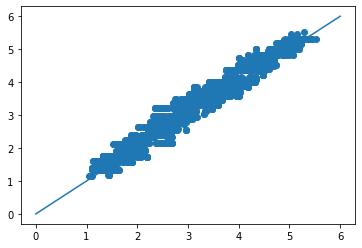

In [214]:
#visualize the match of total production at scale 64 by 64
mypred=cnn_model(mytest_patch[:,:,:,:-1]).numpy()
plt.scatter(mypred.flatten()*20,test_target)
xx=[0,6]
yy=xx
plt.plot(xx,yy)

In [228]:
# total oil production in patch of size 32 by 32
cnn_model32=get_cnn(32)
mytrain_patch,train_target,mytest_patch,test_target=get_aug_train_data(window=32,train_iter=100,train_size=10,train_well_cut=1,test_iter=2,test_size=1000,test_well_cut=1,test_area_dim=[100,199,100,199])
cnn_model32.fit(x=mytrain_patch[:,:,:,:-1],y=train_target.reshape([-1,1])/4,validation_data=(mytest_patch[:,:,:,:-1],test_target.reshape([-1,1])/4),batch_size=256,epochs=50)

train_0
train_1
train_2
train_3
train_4
train_5
train_6
train_7
train_8
train_9
train_10
train_11
train_12
train_13
train_14
train_15
train_16
train_17
train_18
train_19
train_20
train_21
train_22
train_23
train_24
train_25
train_26
train_27
train_28
train_29
train_30
train_31
train_32
train_33
train_34
train_35
train_36
train_37
train_38
train_39
train_40
train_41
train_42
train_43
train_44
train_45
train_46
train_47
train_48
train_49
train_50
train_51
train_52
train_53
train_54
train_55
train_56
train_57
train_58
train_59
train_60
train_61
train_62
train_63
train_64
train_65
train_66
train_67
train_68
train_69
train_70
train_71
train_72
train_73
train_74
train_75
train_76
train_77
train_78
train_79
train_80
train_81
train_82
train_83
train_84
train_85
train_86
train_87
train_88
train_89
train_90
train_91
train_92
train_93
train_94
train_95
train_96
train_97
train_98
train_99
test_0
test_1
Train on 1000 samples, validate on 2000 samples
Epoch 1/50
1000/1000 [==========================


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



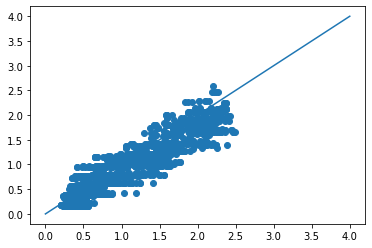

In [229]:
#visualize the match of total production at scale 64 by 64
mypred=cnn_model32(mytest_patch[:,:,:,:-1]).numpy()
plt.scatter(mypred.flatten()*4,test_target)
xx=[0,4]
yy=xx
plt.plot(xx,yy)

In [245]:
# total oil production in patch of size 16 by 16
cnn_model16=get_cnn(16,4)
mytrain_patch,train_target,mytest_patch,test_target=get_aug_train_data(window=16,train_iter=100,train_size=10,train_well_cut=1,test_iter=2,test_size=1000,test_well_cut=1,test_area_dim=[100,199,100,199])
cnn_model16.fit(x=mytrain_patch[:,:,:,:-1],y=train_target.reshape([-1,1])/2,validation_data=(mytest_patch[:,:,:,:-1],test_target.reshape([-1,1])/2),batch_size=256,epochs=300)

train_0
train_1
train_2
train_3
train_4
train_5
train_6
train_7
train_8
train_9
train_10
train_11
train_12
train_13
train_14
train_15
train_16
train_17
train_18
train_19
train_20
train_21
train_22
train_23
train_24
train_25
train_26
train_27
train_28
train_29
train_30
train_31
train_32
train_33
train_34
train_35
train_36
train_37
train_38
train_39
train_40
train_41
train_42
train_43
train_44
train_45
train_46
train_47
train_48
train_49
train_50
train_51
train_52
train_53
train_54
train_55
train_56
train_57
train_58
train_59
train_60
train_61
train_62
train_63
train_64
train_65
train_66
train_67
train_68
train_69
train_70
train_71
train_72
train_73
train_74
train_75
train_76
train_77
train_78
train_79
train_80
train_81
train_82
train_83
train_84
train_85
train_86
train_87
train_88
train_89
train_90
train_91
train_92
train_93
train_94
train_95
train_96
train_97
train_98
train_99
test_0
test_1
Train on 1000 samples, validate on 2000 samples
Epoch 1/300
1000/1000 [=========================

1000/1000 [==============================] - 0s 70us/sample - loss: 0.0064 - val_loss: 0.0057
Epoch 145/300
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0063 - val_loss: 0.0057
Epoch 146/300
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0063 - val_loss: 0.0057
Epoch 147/300
1000/1000 [==============================] - 0s 66us/sample - loss: 0.0063 - val_loss: 0.0056
Epoch 148/300
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0062 - val_loss: 0.0056
Epoch 149/300
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0062 - val_loss: 0.0056
Epoch 150/300
1000/1000 [==============================] - 0s 68us/sample - loss: 0.0062 - val_loss: 0.0056
Epoch 151/300
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0061 - val_loss: 0.0055
Epoch 152/300
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0061 - val_loss: 0.0055
Epoch 153/300
1000/1000 [=================

Epoch 220/300
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0043 - val_loss: 0.0052
Epoch 221/300
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0043 - val_loss: 0.0053
Epoch 222/300
1000/1000 [==============================] - 0s 70us/sample - loss: 0.0043 - val_loss: 0.0053
Epoch 223/300
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0042 - val_loss: 0.0052
Epoch 224/300
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0042 - val_loss: 0.0054
Epoch 225/300
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0042 - val_loss: 0.0052
Epoch 226/300
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0042 - val_loss: 0.0053
Epoch 227/300
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0041 - val_loss: 0.0054
Epoch 228/300
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0041 - val_loss: 0.0055
Epoch 229/300
1000/1000 [===

Epoch 296/300
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0033 - val_loss: 0.0068
Epoch 297/300
1000/1000 [==============================] - 0s 70us/sample - loss: 0.0033 - val_loss: 0.0073
Epoch 298/300
1000/1000 [==============================] - 0s 73us/sample - loss: 0.0033 - val_loss: 0.0068
Epoch 299/300
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0033 - val_loss: 0.0074
Epoch 300/300
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0032 - val_loss: 0.0068



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



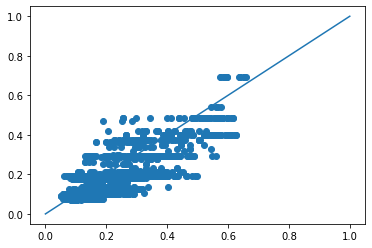

In [246]:
mypred=cnn_model16(mytest_patch[:,:,:,:-1]).numpy()
plt.scatter(mypred.flatten(),test_target/2)
xx=[0,1]
yy=xx
plt.plot(xx,yy)

## Linear regression
### As patch size decreases the accuracy decreases, total production at large scale is used to constrain the production estimate at fine scale and incorporate influences of adjacent wells

In [467]:
test_prod_64,train_prod_64,coefficients_64,patches_64=get_test_coef(window_size=64,min_test_well=5,NN=100)
cnn_64_pred=cnn_model(patches_64[:,:,:,:9]).numpy()*20
cnn_64_test_prod=cnn_64_pred.flatten()-train_prod_64
cnn_64_test_prod=cnn_64_test_prod*prod_scale+prod_bias

In [468]:
test_prod_32,train_prod_32,coefficients_32,patches_32=get_test_coef(window_size=32,min_test_well=1,NN=100)
cnn_32_pred=cnn_model32(patches_32[:,:,:,:9]).numpy()*4
cnn_32_test_prod=cnn_32_pred.flatten()-train_prod_32
cnn_32_test_prod=cnn_32_test_prod*prod_scale+prod_bias

In [469]:
test_prod_16,train_prod_16,coefficients_16,patches_16=get_test_coef(window_size=16,min_test_well=1,NN=100)
cnn_16_pred=cnn_model16(patches_16[:,:,:,:9]).numpy()*2
cnn_16_test_prod=cnn_16_pred.flatten()-train_prod_16
cnn_16_test_prod=cnn_16_test_prod*prod_scale+prod_bias

In [470]:
X_wcut = df_merged[['bottom to woc']]
y_wcut = df_merged['wcut1']
X_total = df_merged[[ "Porosity", "Perm", 'AI', 'sand prp.', 'bottom to woc',  'mindist', 'avg_inv_dist']]
y_total = df_merged['total1']
y_oil = df_merged['Cumoil3']
label = '3rd year cumulative oil'
single_pred=calculate_cum4(X_total, X_wcut, y_total, y_wcut, y_oil, label, regressor_13, method='rf',test_label=test_id==True)
single_scaled=single_pred

### Randomized maximized likelihood estimate is used to quantify uncertainties, data at different scales are selected based on the variance of validation set.

### MSE at well scale

In [471]:
multipliers=[1,8,16,32]

bb=np.concatenate([multipliers[0]*cnn_64_test_prod,multipliers[1]*cnn_32_test_prod,
                   multipliers[2]*cnn_16_test_prod,multipliers[3]*single_pred])
A=np.concatenate([multipliers[0]*coefficients_64,multipliers[1]*coefficients_32,
                  multipliers[2]*coefficients_16,multipliers[3]*np.eye(int(np.sum(test_id)))],axis=0)
solution,resid,rank,s=np.linalg.lstsq(A,bb)

D:\Anaconda3\envs\RL\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [472]:
metrics.mean_squared_error(solution,y_oil[test_id])

56342.087256728395

In [473]:
print('Posterior variance:'+str(np.var(solution-y_oil[test_id])))

Posterior variance:54990.36904700085


### Randomized Maximum Likelihood Estimate

o. To apply randomized maximum likelihood estimate to obtain uncertainty model for test set, noise is added to the estimation according to the data variance calculated from validation set. The validation set we use is adjacent to the unproducing wells and static geophysical response are similar, thus the validation and test set should have similar dynamic response.

o. Uncertainty of data at different scale is calculated from the covariance matrix calculated for validation set.

o. The sampling performed by the patch window is uncertain, which can also introduce uncertainty into this model.

### Covariance matrix calculation

In [474]:
noise_std=[]
#64
mytrain_patch,train_target,mytest_patch,test_target=get_aug_train_data(window=64,train_iter=1,train_size=1,train_well_cut=6,test_iter=2,test_size=1000,test_well_cut=6,test_area_dim=[100,199,100,199])
mypred=cnn_model(mytest_patch[:,:,:,:-1]).numpy()*20
noise_std.append(np.std(mypred-test_target)*prod_scale)

mytrain_patch,train_target,mytest_patch,test_target=get_aug_train_data(window=32,train_iter=1,train_size=1,train_well_cut=1,test_iter=2,test_size=1000,test_well_cut=1,test_area_dim=[100,199,100,199])
mypred=cnn_model32(mytest_patch[:,:,:,:-1]).numpy()*4
noise_std.append(np.std(mypred-test_target)*prod_scale)

mytrain_patch,train_target,mytest_patch,test_target=get_aug_train_data(window=16,train_iter=1,train_size=1,train_well_cut=1,test_iter=2,test_size=1000,test_well_cut=1,test_area_dim=[100,199,100,199])
mypred=cnn_model16(mytest_patch[:,:,:,:-1]).numpy()*2
noise_std.append(np.std(mypred-test_target)*prod_scale)

noise_std.append(np.std(single_pred-y_oil[test_id]))



train_0
test_0
test_1
train_0
test_0
test_1
train_0
test_0
test_1


In [475]:

multipliers=1/np.array(noise_std)

bb=np.concatenate([multipliers[0]*cnn_64_test_prod,multipliers[1]*cnn_32_test_prod,
                   multipliers[2]*cnn_16_test_prod,multipliers[3]*single_pred])
A=np.concatenate([multipliers[0]*coefficients_64,multipliers[1]*coefficients_32,
                  multipliers[2]*coefficients_16,multipliers[3]*np.eye(int(np.sum(test_id)))],axis=0)
solution,resid,rank,s=np.linalg.lstsq(A,bb)

D:\Anaconda3\envs\RL\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [476]:
metrics.mean_squared_error(solution,y_oil[test_id])

51829.85052564144

In [477]:
test_prod_64,train_prod_64,coefficients_64,patches_64=get_test_coef(window_size=64,min_test_well=5,NN=100)
cnn_64_pred=cnn_model(patches_64[:,:,:,:9]).numpy()*20
cnn_64_test_prod=cnn_64_pred.flatten()-train_prod_64
cnn_64_test_prod=cnn_64_test_prod*prod_scale+prod_bias

test_prod_32,train_prod_32,coefficients_32,patches_32=get_test_coef(window_size=32,min_test_well=1,NN=100)
cnn_32_pred=cnn_model32(patches_32[:,:,:,:9]).numpy()*4
cnn_32_test_prod=cnn_32_pred.flatten()-train_prod_32
cnn_32_test_prod=cnn_32_test_prod*prod_scale+prod_bias

test_prod_16,train_prod_16,coefficients_16,patches_16=get_test_coef(window_size=16,min_test_well=1,NN=100)
cnn_16_pred=cnn_model16(patches_16[:,:,:,:9]).numpy()*2
cnn_16_test_prod=cnn_16_pred.flatten()-train_prod_16
cnn_16_test_prod=cnn_16_test_prod*prod_scale+prod_bias

X_wcut = df_merged[['bottom to woc']]
y_wcut = df_merged['wcut1']
X_total = df_merged[[ "Porosity", "Perm", 'AI', 'sand prp.', 'bottom to woc',  'mindist', 'avg_inv_dist']]
y_total = df_merged['total1']
y_oil = df_merged['Cumoil3']
label = '3rd year cumulative oil'
single_pred=calculate_cum4(X_total, X_wcut, y_total, y_wcut, y_oil, label, regressor_13, method='rf',test_label=test_id==True)
single_scaled=single_pred


Add test wells

In [478]:
X=np.concatenate([((df_merged['X']-25)/50).astype(int),((df_n_merged['X']-25)/50).astype(int)])
Y=np.concatenate([((df_merged['Y']-25)/50).astype(int),((df_n_merged['Y']-25)/50).astype(int)])


poro_train=df_merged['Porosity'].values
perm_train=df_merged['Perm'].values

poro_mean=np.concatenate([df_merged['Porosity'].values,df_n_merged['Porosity'].values])
perm_mean=np.concatenate([df_merged['Perm'].values,df_n_merged['Perm'].values])

poro_mean=(poro_mean-poro_train.min()+0.1)/(poro_train.max()-poro_train.min()+0.1)
perm_mean=(perm_mean-perm_train.min()+0.5)/(perm_train.max()-perm_train.min()+0.5)

new_prod=np.concatenate([(df_merged['Cumoil3'].values-prod_bias)/prod_scale,0.0000000001*np.ones(10)])
test_area_dim=[73,111,119,181]
test_id=((X>test_area_dim[2])*(X<test_area_dim[3])*(Y>test_area_dim[0])*(Y<test_area_dim[1])).astype(bool)
my_well_data=np.stack([X,Y,np.ones(83),poro_mean,perm_mean,new_prod,test_id],axis=-1)


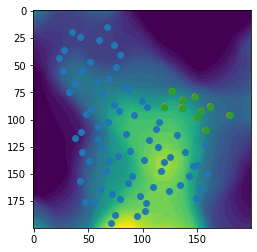

In [479]:
plt.imshow(map_prop[:,:,0])
plt.scatter(X,Y)
plt.scatter(X,Y,s=test_id*30)
plt.scatter(X[-10:],Y[-10:])

In [480]:
test_prod_64,train_prod_64,coefficients_64,patches_64=get_test_coef(window_size=64,min_test_well=5,NN=100)
cnn_64_pred=cnn_model(patches_64[:,:,:,:9]).numpy()*20
cnn_64_test_prod=cnn_64_pred.flatten()-train_prod_64
cnn_64_test_prod=cnn_64_test_prod*prod_scale+prod_bias

test_prod_32,train_prod_32,coefficients_32,patches_32=get_test_coef(window_size=32,min_test_well=1,NN=100)
cnn_32_pred=cnn_model32(patches_32[:,:,:,:9]).numpy()*4
cnn_32_test_prod=cnn_32_pred.flatten()-train_prod_32
cnn_32_test_prod=cnn_32_test_prod*prod_scale+prod_bias

test_prod_16,train_prod_16,coefficients_16,patches_16=get_test_coef(window_size=16,min_test_well=1,NN=100)
cnn_16_pred=cnn_model16(patches_16[:,:,:,:9]).numpy()*2
cnn_16_test_prod=cnn_16_pred.flatten()-train_prod_16
cnn_16_test_prod=cnn_16_test_prod*prod_scale+prod_bias

In [481]:
def regress_cum3(X_total, X_wcut, total, wcut, oil, label, regressor13, method='rf'):
    oil_tests = []
    oil_predict_tests = []
    np.random.seed(4)
    
    X_total_train, X_total_test, X_wcut_train, X_wcut_test, total_train, total_test, wcut_train, wcut_test, oil_train, oil_test  = \
    train_test_split(X_total, X_wcut, total, wcut, oil , test_size = 0.3)
    if method == 'rf':
        regressor_total = RandomForestRegressor(n_estimators=800, max_depth=25, min_samples_leaf=2,\
                               min_samples_split= 2, max_features= 'sqrt', bootstrap =False )
    if method == 'linear':
        regressor_total = LinearRegression()
    regressor_total.fit(X_total_train, total_train)
    total_predict_test = regressor_total.predict(X_total_test)
    regressor_wcut = LinearRegression()
    regressor_wcut.fit(X_wcut_train, wcut_train)     
    wcut1_predict_test = regressor_wcut.predict(X_wcut_test)
    oil1_predict_test = total_predict_test*(1-wcut1_predict_test) # 1st year oil

    oil_predict_test = regressor13.predict(np.array([oil1_predict_test,wcut1_predict_test]).T) ## 3rd year cum

    oil_tests.append(oil_test)
    oil_predict_tests.append(oil_predict_test)
#         print(oil_test.shape == oil_predict_test.shape)
        
    
    oil_tests = np.array(oil_tests).flatten()
    oil_predict_tests = np.array(oil_predict_tests).flatten()
    print(oil_tests.shape)
    print(oil_predict_tests.shape)

    print("\nMETRICS FOR TESTING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(oil_tests, oil_predict_tests))
    print('Mean Squared Error:', metrics.mean_squared_error(oil_tests, oil_predict_tests))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(oil_tests, oil_predict_tests)))
    print('R-Squared:', metrics.r2_score(oil_tests, oil_predict_tests))
    print('Explained variance:', metrics.explained_variance_score(oil_tests, oil_predict_tests))

    

    # Testing data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=oil_tests, y=oil_predict_tests, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_testing.png",
        bbox_inches='tight', dpi=200)
    plt.show()
    plt.close()
    return regressor_total, regressor_wcut, regressor13



In [482]:
def predict_cum3_final(X_total, X_wcut,label, regressor_total, regressor_wcut, regressor13, method='rf'):

    total_predict = regressor_total.predict(X_total)
    wcut1_predict = regressor_wcut.predict(X_wcut)
    oil_1_predict = total_predict*(1-wcut1_predict) # 1st year oil
    oil_predict = regressor13.predict(np.array([oil_1_predict,wcut1_predict]).T) ## 3rd year cum        
    

    return oil_predict


(22,)
(22,)

METRICS FOR TESTING DATA:

Mean Absolute Error: 172.78730371789428
Mean Squared Error: 50316.11195645347
Root Mean Squared Error: 224.3125318756254
R-Squared: 0.6739424182727347
Explained variance: 0.6921767568110029


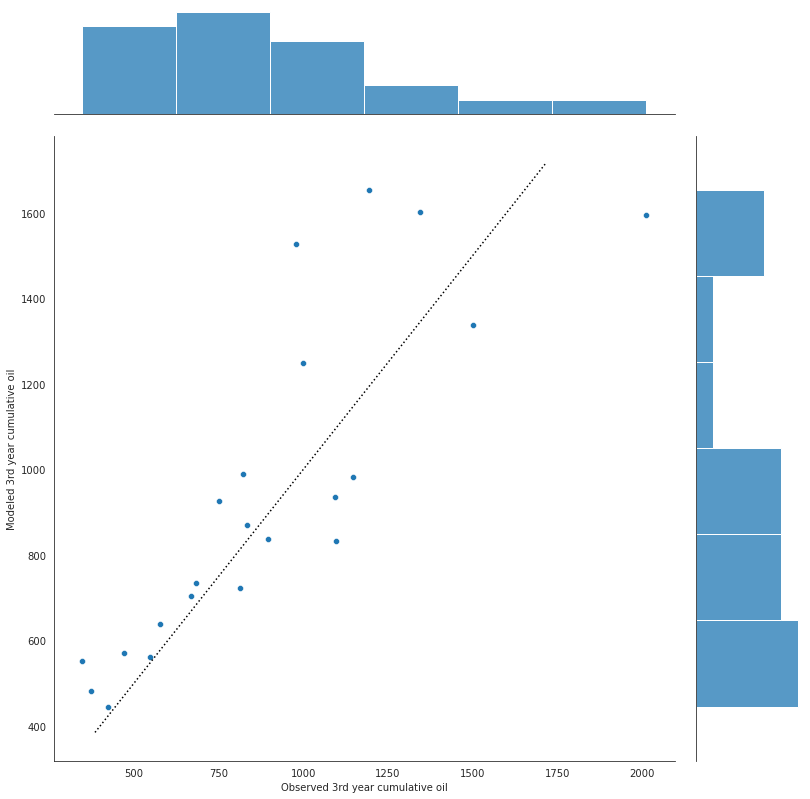

In [483]:
X_wcut = df_merged[['bottom to woc']]
y_wcut = df_merged['wcut1']
X_total = df_merged[[ "Porosity", "Perm", 'AI', 'sand prp.', 'bottom to woc',  'mindist', 'avg_inv_dist']]
y_total = df_merged['total1']
y_oil = df_merged['Cumoil3']
label = '3rd year cumulative oil'
regressor_total, regressor_wcut, regressor13 = regress_cum3(X_total, X_wcut, y_total, y_wcut, y_oil, label, regressor_13, method='rf')
# new wells predictions
X_wcut = df_n[['bottom to woc']]
X_total = df_n[[ "Porosity", "Perm", 'AI', 'sand prp.', 'bottom to woc',  'mindist', 'avg_inv_dist']]

predictions = predict_cum3_final(X_total, X_wcut,label, regressor_total, regressor_wcut, regressor13, method='rf')

In [484]:
multipliers=1/np.array(noise_std)

bb=np.concatenate([multipliers[0]*cnn_64_test_prod,multipliers[1]*cnn_32_test_prod,
                   multipliers[2]*cnn_16_test_prod,multipliers[3]*predictions])
A=np.concatenate([multipliers[0]*coefficients_64,multipliers[1]*coefficients_32,
                  multipliers[2]*coefficients_16,multipliers[3]*np.eye(int(np.sum(test_id)))],axis=0)
solution,resid,rank,s=np.linalg.lstsq(A,bb)

D:\Anaconda3\envs\RL\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


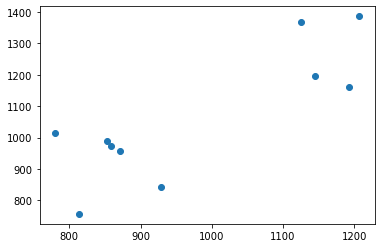

In [485]:
plt.scatter(solution,predictions)

In [500]:
final_result=np.sqrt(50000)*np.random.normal(0,1,(100,10))+solution

In [501]:
np.savetxt("final_result.csv", np.concatenate([solution,final_result],axis=0), delimiter=",")